# importing the dataset

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
#Load the original csv files(Fake.csv & True.csv)
fake_df = pd.read_csv('/content/drive/MyDrive/ML/Fake.csv')
real_df = pd.read_csv('/content/drive/MyDrive/ML/True.csv')

In [3]:
# Viewing the fake dataset
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
#checking to see if there is any missing values in Fake.csv dataset
missing_fake_data = fake_df.isnull().sum()
print(missing_fake_data)

title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
# Viewing the true dataset
real_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [6]:
#checking to see if there is any missing values in Fake.csv dataset
missing_real_data = real_df.isnull().sum()
print(missing_real_data)

title      0
text       0
subject    0
date       0
dtype: int64


In [7]:
#Add a 'label' column to each dataframe
fake_df['label'] = 'fake'
real_df['label'] = 'real'

In [8]:
# checking to see if the two dataframe have the same columns before combining them
print(fake_df.columns)
print(real_df.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


Combining the two dataframes (i.e. Fake.csv & Real.csv)

In [9]:
# Ensuring that both dataframes have properly aligned indices
#To avoid duplicates indicates while consistent concatenation
# # drop=True ensures old indices are not added to the new column

fake_df = fake_df.reset_index(drop=True)
real_df = real_df.reset_index(drop=True)

# Combining the Fake.csv and Real.csv dataframes
combined_df = pd.concat([fake_df, real_df], ignore_index=True) # combine and number them

In [10]:
# Checking again if there is any missing values after combining the dataframes
missing_combined_data = combined_df.isnull().sum()
print(missing_combined_data)

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [11]:
#Viewing the first 5 rows
combined_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake

In [12]:
#Viewing the last 5 rows
combined_df.tail()

title  \
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date label  
44893  August 22, 2017   real  
44894  August 22, 2017   real  
44895  August 22, 2017   real  
44896  August 22, 2017   real  
44897  August 22, 2017   real

In [13]:
# Shuffling the combined dataframe
shuffled_df = shuffle(combined_df, random_state=42) # random_state=42 for reproducibility

In [14]:
# Checking the shuffled  dataframe
shuffled_df.head()

title  \
22216  Ben Stein Calls Out 9th Circuit Court: Committ...   
27917  Trump drops Steve Bannon from National Securit...   
25007  Puerto Rico expects U.S. to lift Jones Act shi...   
1377    OOPS: Trump Just Accidentally Confirmed He Le...   
32476  Donald Trump heads for Scotland to reopen a go...   

                                                    text       subject  \
22216  21st Century Wire says Ben Stein, reputable pr...       US_News   
27917  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
25007  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
1377   On Monday, Donald Trump once again embarrassed...          News   
32476  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                      date label  
22216    February 13, 2017  fake  
27917       April 5, 2017   real  
25007  September 27, 2017   real  
1377          May 22, 2017  fake  
32476       June 24, 2016   real

In [15]:
#Checking the total number of fake and real news in the dataset
shuffled_df.value_counts('label')

label
fake    23481
real    21417
Name: count, dtype: int64

In [16]:
#creating a new column 'label_num' and mapping 'fake' to 1 and 'real' to 0
shuffled_df['label_num'] = shuffled_df['label'].map({'fake': 1, 'real': 0})

# Checking the first few rows to see if the new column was created correctly
print(shuffled_df[['label', 'label_num']].head())

      label  label_num
22216  fake          1
27917  real          0
25007  real          0
1377   fake          1
32476  real          0


In [17]:
# Saving the dataframe to my google
path = '/content/drive/MyDrive/ML/my_isot_data.csv'
shuffled_df.to_csv(path, index=False)

In [18]:
#Loading the dataset from my google drive
my_isot_data=pd.read_csv('/content/drive/MyDrive/ML/my_isot_data.csv')

# Data Understanding and Analytics





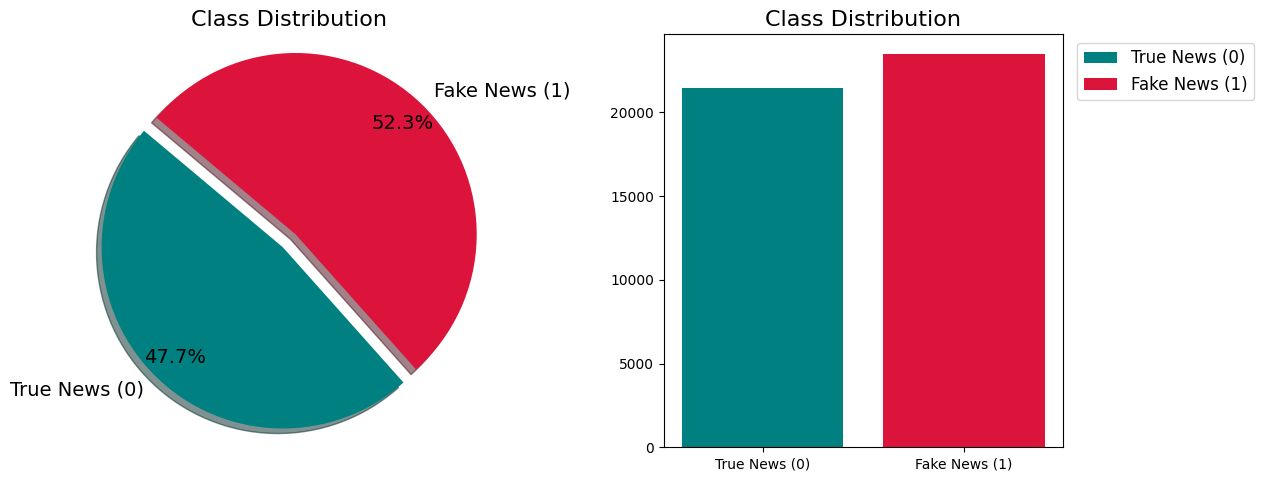

In [19]:
import matplotlib.pyplot as plt

# Get the count of each class (True News and Fake News)
value_counts = my_isot_data['label'].value_counts()
categories = ['True News (0)', 'Fake News (1)']
counts = [value_counts.get('real', 0), value_counts.get('fake', 1)]

# Set up the figure with two subplots (Pie chart and Bar chart)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
colors = ['teal', 'crimson']
explode = [0.05, 0.05]  # Slightly separate the slices
ax1.pie(counts, explode=explode, labels=categories, autopct='%1.1f%%', startangle=140,
        pctdistance=0.85, colors=colors, textprops={'fontsize': 14}, shadow=True)
ax1.set_title('Class Distribution', fontsize=16)
ax1.axis('equal')  # Equal aspect ratio ensures the pie is circular

# Bar Chart
ax2.bar(categories, counts, color=colors)
ax2.set_title('Class Distribution', fontsize=16)

# Add a legend outside the bar chart
legend_colors = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax2.legend(legend_colors, categories, fontsize=12, loc='upper right', bbox_to_anchor=(1.5, 1))

# Adjust layout to make sure plots don't overlap
plt.tight_layout(pad=5)

# Show the plot
plt.show()


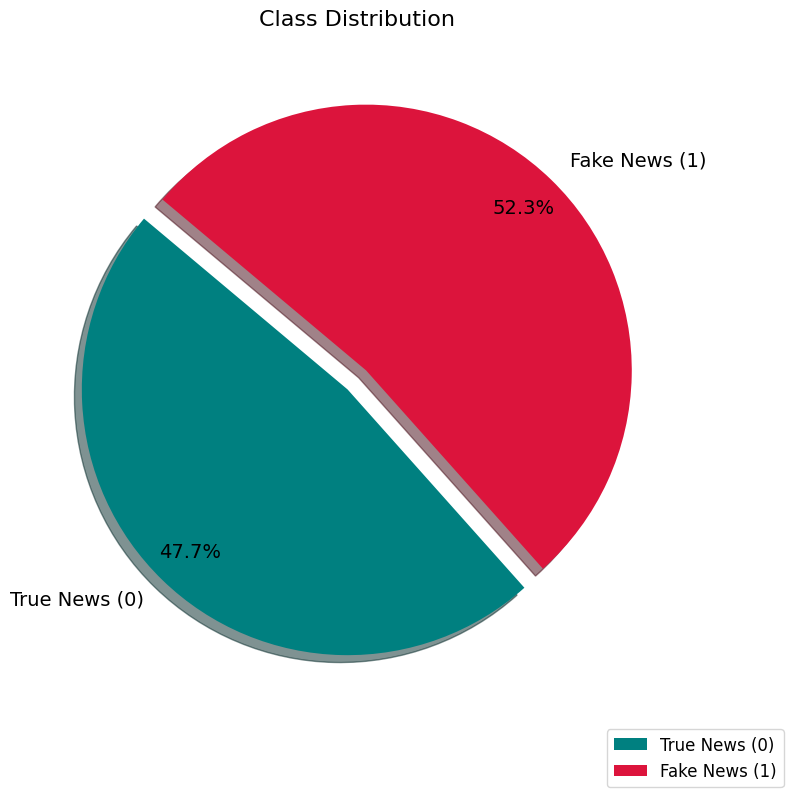

In [20]:
import matplotlib.pyplot as plt

# Get the count of each class (True News and Fake News)
value_counts = my_isot_data['label'].value_counts()
categories = ['True News (0)', 'Fake News (1)']
counts = [value_counts.get('real', 0), value_counts.get('fake', 1)]

# Simplified Pie Chart
colors = ['teal', 'crimson']
explode = [0.05, 0.05]  # Slightly separate the slices

plt.figure(figsize=(8, 8))
plt.pie(counts, explode=explode, labels=categories, autopct='%1.1f%%', startangle=140,
        pctdistance=0.85, colors=colors, textprops={'fontsize': 14}, shadow=True)
plt.title('Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.legend(categories, fontsize=12, loc='lower left', bbox_to_anchor=(0.9, -0.1))

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
#checking the data types in the dataset
my_isot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   label      44898 non-null  object
 5   label_num  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [22]:
# Checking the descriptive analysis of the dataset
my_isot_data.describe(include='all')

title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

             subject                date  label     label_num  
count          44898               44898  44898  44898.000000  
unique             8                2397      2           NaN  
top     politicsNews  December 20, 2017    fake           NaN  
freq           11272                 182  23481           NaN  
mean             NaN                 NaN    NaN      0.522985  
std              NaN                 NaN    NaN      0.499477  
min              NaN                 NaN    NaN      0.000000  
25%              NaN                 NaN    NaN      0.000000  
50%              NaN                 NaN    NaN      1.000000  
75%              NaN                 NaN    NaN      1.000000  
max              NaN                 NaN    NaN      1.000000

In [23]:
# creating a 'word_count' column to count the instances of the text column which is my focus
my_isot_data['word_count'] = my_isot_data['text'].apply(lambda x: len(str(x).split()))
print(my_isot_data['word_count'].describe())

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: word_count, dtype: float64


In [24]:
# Checking the descriptive analysis again after creating word_count
my_isot_data.describe(include='all')

title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

             subject                date  label     label_num    word_count  
count          44898               44898  44898  44898.000000  44898.000000  
unique             8                2397      2           NaN           NaN  
top     politicsNews  December 20, 2017    fake           NaN           NaN  
freq           11272                 182  23481           NaN           NaN  
mean             NaN                 NaN    NaN      0.522985    405.282284  
std              NaN                 NaN    NaN      0.499477    351.265595  
min              NaN                 NaN    NaN      0.000000      0.000000  
25%              NaN                 NaN    NaN      0.000000    203.000000  
50%              NaN                 NaN    NaN      1.000000    362.000000  
75%              NaN                 NaN    NaN      1.000000    513.000000  
max              NaN                 NaN    NaN      1.000000   8135.000000

In [25]:
# Checking each unique occurence in the text column
text_counts = my_isot_data['text'].value_counts()

# checking top ocuuring unique text
print(text_counts.head())

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

From the above output, it can be seen empty space is most occuring text( appears 627) , hence i probe futher

In [26]:
# investigating the most occuring text
most_frequent_text = text_counts.index[0]
print("Most frequent text (appears {} times):".format(text_counts[0]))
print(repr(most_frequent_text))  # repr() shows string literals
print("Length:", len(most_frequent_text))

Most frequent text (appears 627 times):
' '
Length: 1


<ipython-input-26-465b348b7fff>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Most frequent text (appears {} times):".format(text_counts[0]))


In [27]:
# Check for entries with zero words but non-zero length
zero_words_non_empty = my_isot_data[(my_isot_data['word_count'] == 0) & (my_isot_data['text'].str.len() > 0)]
print("Entries with zero words but non-zero length:", len(zero_words_non_empty))

# Check for truly empty strings
truly_empty = my_isot_data[my_isot_data['text'] == '']
print("Truly empty entries:", len(truly_empty))

# Check for entries that are just whitespace
just_whitespace = my_isot_data[my_isot_data['text'].str.isspace()]
print("Entries with only whitespace:", len(just_whitespace))

Entries with zero words but non-zero length: 631
Truly empty entries: 0
Entries with only whitespace: 631


In [28]:
# Check for entries with zero words
zero_words = my_isot_data[my_isot_data['word_count'] == 0]
print(f"Entries with zero words: {len(zero_words)}")  # Print the count of entries with zero words

# Display the unique content of entries that have zero words and their counts
print("Entries with zero words content:")
for text, count in zero_words['text'].value_counts().items():
    print(f"'{text}': {count} times")



Entries with zero words: 631
Entries with zero words content:
' ': 627 times
'  ': 4 times


## Checking for potential duplicates

In [29]:
# Check for duplicate rows
duplicate_rows = my_isot_data.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 209


In [30]:
# delete or dropping the duplicated rows of 209

# Remove duplicate rows, keeping the first occurrence
#my_isot_data_cleaned = my_isot_data.drop_duplicates(keep='first')

# Check the shape of the dataframe before and after removing duplicates
#print("Shape before removing duplicates:", my_isot_data.shape)
#print("Shape after removing duplicates:", my_isot_data_cleaned.shape)

## Checking the exact duplicated rows

In [31]:
# Identify exact duplicates
duplicate_mask = my_isot_data.duplicated(keep=False)
exact_duplicates = my_isot_data[duplicate_mask]

# Sort the duplicates to group them together
exact_duplicates_sorted = exact_duplicates.sort_values(by=exact_duplicates.columns.tolist())

# Display the number of exact duplicates
print(f"Number of exact duplicate rows including first occurence: {len(exact_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries:")
print(exact_duplicates_sorted.head(10))  # Adjust the number as needed

# Optionally, count occurrences of each duplicate
#duplicate_counts = exact_duplicates.groupby(exact_duplicates.columns.tolist()).size().reset_index(name='count')
#duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

#print("\nMost frequent duplicates:")
#print(duplicate_counts.head())  # Adjust the number as needed

Number of exact duplicate rows including first occurence: 405

First few duplicate entries:
                                                   title  \
33861  'Nuclear option' fallout? More extreme U.S. ju...   
35498  'Nuclear option' fallout? More extreme U.S. ju...   
29669  After U.S. veto, U.N. General Assembly to meet...   
39791  After U.S. veto, U.N. General Assembly to meet...   
25413  Another U.S. appeals court refuses to revive T...   
41004  Another U.S. appeals court refuses to revive T...   
27910  Arab coalition says will keep Yemen port open;...   
44434  Arab coalition says will keep Yemen port open;...   
3121   Australia finds wreck of first Allied submarin...   
24671  Australia finds wreck of first Allied submarin...   

                                                    text       subject  \
33861  WASHINGTON (Reuters) - A Republican-backed Sen...  politicsNews   
35498  WASHINGTON (Reuters) - A Republican-backed Sen...  politicsNews   
29669  UNITED NATIONS (Re

## Checking the content to be sure

In [32]:
my_isot_data['text'].iloc[33861]

'WASHINGTON (Reuters) - A Republican-backed Senate rule change expected on Thursday could make it more likely that presidents will pick ideologically extreme U.S. Supreme Court nominees with little incentive to choose centrist justices, experts said. With a deep partisan divide in Washington, Democrats are using a procedural tactic called a filibuster to try to block confirmation of President Donald Trump’s Supreme Court nominee Neil Gorsuch in the Republican-led Senate. Majority Leader Mitch McConnell has threatened to change long-standing rules in the 100-seat Senate if the Democrats succeed with the filibuster in order to prohibit the tactic against Supreme Court nominees. That would mean such nominees could be confirmed by a simple majority rather than needing to first muster a 60-vote super-majority. Experts said the rule change, called the “nuclear option,” could produce an ever-more ideologically polarized Supreme Court. Over the years with the Senate narrowly divided, the filib

In [33]:
my_isot_data['text'].iloc[35498]

'WASHINGTON (Reuters) - A Republican-backed Senate rule change expected on Thursday could make it more likely that presidents will pick ideologically extreme U.S. Supreme Court nominees with little incentive to choose centrist justices, experts said. With a deep partisan divide in Washington, Democrats are using a procedural tactic called a filibuster to try to block confirmation of President Donald Trump’s Supreme Court nominee Neil Gorsuch in the Republican-led Senate. Majority Leader Mitch McConnell has threatened to change long-standing rules in the 100-seat Senate if the Democrats succeed with the filibuster in order to prohibit the tactic against Supreme Court nominees. That would mean such nominees could be confirmed by a simple majority rather than needing to first muster a 60-vote super-majority. Experts said the rule change, called the “nuclear option,” could produce an ever-more ideologically polarized Supreme Court. Over the years with the Senate narrowly divided, the filib

## Visualizing the duplicated rows

In [1]:
# Count duplicates and non-duplicates
duplicates = my_isot_data.duplicated().sum()
non_duplicates = len(my_isot_data) - duplicates

# Data for the pie chart
sizes = [non_duplicates, duplicates]
labels = ['Non-Duplicate', 'Duplicate']
colors = ['lightblue', 'lightcoral']

# Create and display the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Duplicate and Non-Duplicate Rows')
plt.axis('equal')  # Ensure the pie chart is circular
plt.legend(loc='best')
plt.show()

# Print summary
print(f"Total Rows: {len(my_isot_data)}")
print(f"Non-Duplicate Rows: {non_duplicates}")
print(f"Duplicates: {duplicates}")

NameError: name 'my_isot_data' is not defined

## Checking the duplicates based on 'text' column only

In [35]:
#Check for duplicates based on the title column
title_duplicates = my_isot_data.duplicated(subset=['title']).sum()
print(f"Duplicates based on title: {title_duplicates}")

#Check for duplicates based text column
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()
print(f"Duplicates based on content(text): {content_duplicates}")

Duplicates based on title: 6169
Duplicates based on content(text): 6252


## Checking the exact duplicated news artcles(text) including the first occurence

In [36]:
# Identify exact duplicates
duplicate_mask = my_isot_data.duplicated(subset=['text'],keep=False)
exact_duplicates = my_isot_data[duplicate_mask]

# Sort the duplicates to group them together
exact_duplicates_sorted = exact_duplicates.sort_values(by=exact_duplicates.columns.tolist())

# Display the number of exact duplicates
print(f"Number of exact duplicate text including first occurence: {len(exact_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries:")
print(exact_duplicates_sorted.head(10))  # Adjust the number as needed

# Optionally, count occurrences of each duplicate
duplicate_counts = exact_duplicates.groupby(exact_duplicates.columns.tolist()).size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

Number of exact duplicate text including first occurence: 11392

First few duplicate entries:
                                                   title  \
7281   #AnyoneButHillary: NEW POLL Shows Bernie Suppo...   
10583  #AnyoneButHillary: NEW POLL Shows Bernie Suppo...   
10658  #Austin: Fights Break Out Between Police and S...   
9926   #Austin: Fights Break Out Between Police and S...   
3574   #Berkeley CRAZY! RIOTERS CHASE And Beat People...   
998    #Berkeley CRAZY! RIOTERS CHASE And Beat People...   
22741  #Berkeley IRONY ALERT! ANARCHISTS LOOT STARBUC...   
32422  #Berkeley IRONY ALERT! ANARCHISTS LOOT STARBUC...   
9393   #BlackLivesMatter Supporters Say No Connection...   
28985  #BlackLivesMatter Supporters Say No Connection...   

                                                    text    subject  \
7281   Hillary may find out she needs more than black...  left-news   
10583  Hillary may find out she needs more than black...   politics   
10658  Commies carrying flags fo

## As it can be seen above, there are 6252 text duplicates with different subject or dates or subjects

In [37]:
# checking the content to be sure
my_isot_data['text'].iloc[7281]

'Hillary may find out she needs more than black women drag her lying criminal ass over the finish line Actress and Bernie Sanders supporter Susan Sarandon recently received shock and criticism for suggesting she may not vote for Hillary Clinton in the general election. She s not alone. According to a recent McClatchy-Marist Poll conducted on March 29-31, 25 percent of Sanders supporters would not support her, while 69 percent would. Sanders voters are even more committed to him   and perhaps against Clinton,  McClatchy DC suggested that after Sanders s Tuesday win in Wisconsin.While voters under 45 are among the most likely to eventually support Hillary, they could play a role in her possibly losing to the Republican nominee. Even if they don t vote for a Republican, staying home could cause Hillary to come up short.Lee Miringoff, director of the Marist Institute for Public Opinion, called the possibility  potentially worrisome  for Hillary.  Age seems to be the most significant factor

In [38]:
my_isot_data['text'].iloc[10583]

'Hillary may find out she needs more than black women drag her lying criminal ass over the finish line Actress and Bernie Sanders supporter Susan Sarandon recently received shock and criticism for suggesting she may not vote for Hillary Clinton in the general election. She s not alone. According to a recent McClatchy-Marist Poll conducted on March 29-31, 25 percent of Sanders supporters would not support her, while 69 percent would. Sanders voters are even more committed to him   and perhaps against Clinton,  McClatchy DC suggested that after Sanders s Tuesday win in Wisconsin.While voters under 45 are among the most likely to eventually support Hillary, they could play a role in her possibly losing to the Republican nominee. Even if they don t vote for a Republican, staying home could cause Hillary to come up short.Lee Miringoff, director of the Marist Institute for Public Opinion, called the possibility  potentially worrisome  for Hillary.  Age seems to be the most significant factor

## Probing further Checking duplication based on Text and Title only to see how of the 6,252 duplicates have the same text and title

In [39]:
# For title duplicates
title_duplicates = my_isot_data.duplicated(subset=['title']).sum()

# For content duplicates
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()

# For complete duplicates (both title and content)
complete_duplicates = my_isot_data.duplicated(subset=['title', 'text']).sum()

total_rows = len(my_isot_data)

print(f"Title duplicates (excluding first occurrence): {title_duplicates}")
print(f"Percentage of title duplicates: {title_duplicates/total_rows*100:.2f}%")

print(f"\nContent(Text) duplicates (excluding first occurrence): {content_duplicates}")
print(f"Percentage of content duplicates: {content_duplicates/total_rows*100:.2f}%")

print(f"\nTitle & Text duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")

Title duplicates (excluding first occurrence): 6169
Percentage of title duplicates: 13.74%

Content(Text) duplicates (excluding first occurrence): 6252
Percentage of content duplicates: 13.92%

Title & Text duplicates (excluding first occurrence): 5793
Percentage of complete duplicates: 12.90%


## Duplication excluding first occurence -  based on Text and Date

In [40]:
# For date duplicates
date_duplicates = my_isot_data.duplicated(subset=['date']).sum()

# For content duplicates
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()

# For complete duplicates (both date and content)
complete_duplicates = my_isot_data.duplicated(subset=['date', 'text']).sum()

total_rows = len(my_isot_data)

print(f"Date duplicates (excluding first occurrence): {date_duplicates}")
print(f"Percentage of date duplicates: {date_duplicates/total_rows*100:.2f}%")

print(f"\nText duplicates (excluding first occurrence): {content_duplicates}")
print(f"Percentage of content duplicates: {content_duplicates/total_rows*100:.2f}%")

print(f"\nText & Date duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")

Date duplicates (excluding first occurrence): 42501
Percentage of date duplicates: 94.66%

Text duplicates (excluding first occurrence): 6252
Percentage of content duplicates: 13.92%

Text & Date duplicates (excluding first occurrence): 6021
Percentage of complete duplicates: 13.41%


## Duplication excluding first occurence - based on Text and Subject

In [41]:
# For subject duplicates
subject_duplicates = my_isot_data.duplicated(subset=['subject']).sum()

# For content duplicates
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()

# For complete duplicates (both subject and content)
complete_duplicates = my_isot_data.duplicated(subset=['subject', 'text']).sum()

total_rows = len(my_isot_data)

print(f"Subject duplicates (excluding first occurrence): {subject_duplicates}")
print(f"Percentage of subject duplicates: {subject_duplicates/total_rows*100:.2f}%")

print(f"\nText duplicates (excluding first occurrence): {content_duplicates}")
print(f"Percentage of content duplicates: {content_duplicates/total_rows*100:.2f}%")

print(f"\nText & Subject duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")

Subject duplicates (excluding first occurrence): 44890
Percentage of subject duplicates: 99.98%

Text duplicates (excluding first occurrence): 6252
Percentage of content duplicates: 13.92%

Text & Subject duplicates (excluding first occurrence): 855
Percentage of complete duplicates: 1.90%


## Duplication excluding first occurence - based on Text and Subject

In [42]:

# For content duplicates
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()

# For complete duplicates (both label and content)
complete_duplicates = my_isot_data.duplicated(subset=['label', 'text']).sum()

total_rows = len(my_isot_data)

print(f"Label duplicates (excluding first occurrence): {subject_duplicates}")
print(f"Percentage of label duplicates: {subject_duplicates/total_rows*100:.2f}%")

print(f"\nText duplicates (excluding first occurrence): {content_duplicates}")
print(f"Percentage of content duplicates: {content_duplicates/total_rows*100:.2f}%")

print(f"\nText & label duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")

Label duplicates (excluding first occurrence): 44890
Percentage of label duplicates: 99.98%

Text duplicates (excluding first occurrence): 6252
Percentage of content duplicates: 13.92%

Text & label duplicates (excluding first occurrence): 6251
Percentage of complete duplicates: 13.92%


## Duplicates based Text,Title and Subject

In [43]:
# For complete duplicates based on text,title,subject
complete_duplicates = my_isot_data.duplicated(subset=['title', 'subject','text','label']).sum()

total_rows = len(my_isot_data)


print(f"\nText,Title & Subject duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")


Text,Title & Subject duplicates (excluding first occurrence): 213
Percentage of complete duplicates: 0.47%


## Duplicates based Text,Title and Date

In [44]:
# For complete duplicates text,title ,datte
complete_duplicates = my_isot_data.duplicated(subset=['title', 'date','text','label']).sum()

total_rows = len(my_isot_data)


print(f"\nText,Title, & Date duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")


Text,Title, & Date duplicates (excluding first occurrence): 5788
Percentage of complete duplicates: 12.89%


## Duplicates based on Text,Date, and Subject

In [45]:
# For complete duplicates (both label and content)
complete_duplicates = my_isot_data.duplicated(subset=['text','date','subject','label']).sum()

total_rows = len(my_isot_data)


print(f"\nText,Date,& Subject duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")


Text,Date,& Subject duplicates (excluding first occurrence): 475
Percentage of complete duplicates: 1.06%


## Verifying the first detected duplicated rows of 209

In [46]:
# For complete duplicates (both label and content)
complete_duplicates = my_isot_data.duplicated(subset=['text','date','subject','title','label']).sum()

total_rows = len(my_isot_data)


print(f"\nText,Date,Subject,Title duplicates (excluding first occurrence): {complete_duplicates}")
print(f"Percentage of complete duplicates: {complete_duplicates/total_rows*100:.2f}%")


Text,Date,Subject,Title duplicates (excluding first occurrence): 209
Percentage of complete duplicates: 0.47%


## Checking for text appearing in both real and fake

In [47]:
#Checking for cross-label duplicates
# Group by text and check if any text appears in both categories
cross_label_dupes = my_isot_data.groupby('text')['label'].nunique()
print("\nTexts appearing in both categories:", (cross_label_dupes > 1).sum())


Texts appearing in both categories: 1


## Checking the distribution text duplicates across the label

In [48]:
# Identify duplicated texts, excluding the first occurrence
duplicated_texts = my_isot_data[my_isot_data.duplicated(subset=['text'], keep='first')]

# Count duplicates for each label
fake_duplicates = duplicated_texts[duplicated_texts['label'] == 'fake']
real_duplicates = duplicated_texts[duplicated_texts['label'] == 'real']

# Output the results
print(f"Total actual duplicates (excluding first occurrences): {len(duplicated_texts)}")
print(f"Duplicates in 'fake' category: {len(fake_duplicates)}")
print(f"Duplicates in 'real' category: {len(real_duplicates)}")

Total actual duplicates (excluding first occurrences): 6252
Duplicates in 'fake' category: 6026
Duplicates in 'real' category: 226


## Text duplicates realted to label= real

In [49]:
# Identify exact duplicates with label='real'
real_entries = my_isot_data[my_isot_data['label'] == 'real']
duplicate_mask = real_entries.duplicated(subset=['text'], keep=False)
real_duplicates = real_entries[duplicate_mask]

# Sort the duplicates to group them together
real_duplicates_sorted = real_duplicates.sort_values(by=['text'])

# Display the number of exact duplicates
print(f"Number of exact duplicate texts in 'real' category (including first occurrence): {len(real_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries in 'real' category:")
print(real_duplicates_sorted[['label', 'text', 'date', 'subject', 'title']].head(10))  # Now including 'label'

# Optionally, count occurrences of each duplicate
duplicate_counts = real_duplicates.groupby('text').size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

print("\nTop 5 most frequent duplicates in 'real' category:")
print(duplicate_counts.head())

Number of exact duplicate texts in 'real' category (including first occurrence): 437

First few duplicate entries in 'real' category:
      label                                               text  \
33113  real   (Corrects a Dec. 19 story to make clear in gr...   
43215  real   (Corrects a Dec. 19 story to make clear in gr...   
22644  real  (Reuters) - British Prime Minister Theresa May...   
5794   real  (Reuters) - British Prime Minister Theresa May...   
7190   real  (Reuters) - German Chancellor Angela Merkel s ...   
37079  real  (Reuters) - German Chancellor Angela Merkel s ...   
31028  real  (Reuters) - Highlights for U.S. President Dona...   
16416  real  (Reuters) - Highlights for U.S. President Dona...   
22443  real  (Reuters) - Highlights for U.S. President Dona...   
8164   real  (Reuters) - Highlights for U.S. President Dona...   

                     date       subject  \
33113  December 19, 2017      worldnews   
43215  December 19, 2017      worldnews   
22644  Dec

In [50]:
# Identify exact duplicates with label='real', excluding first occurrence
real_entries = my_isot_data[my_isot_data['label'] == 'real']
duplicate_mask = real_entries.duplicated(subset=['text'], keep='first')
real_duplicates = real_entries[duplicate_mask]

# Sort the duplicates to group them together
real_duplicates_sorted = real_duplicates.sort_values(by=['text'])

# Display the number of exact duplicates
print(f"Number of exact duplicate texts in 'real' category (excluding first occurrence): {len(real_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries in 'real' category:")
print(real_duplicates_sorted[['label', 'text', 'date', 'subject', 'title']].head(10))

# Optionally, count occurrences of each duplicate
duplicate_counts = real_duplicates.groupby('text').size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

print("\nTop 5 most frequent duplicates in 'real' category:")
print(duplicate_counts.head())

Number of exact duplicate texts in 'real' category (excluding first occurrence): 225

First few duplicate entries in 'real' category:
      label                                               text  \
43215  real   (Corrects a Dec. 19 story to make clear in gr...   
22644  real  (Reuters) - British Prime Minister Theresa May...   
37079  real  (Reuters) - German Chancellor Angela Merkel s ...   
31028  real  (Reuters) - Highlights for U.S. President Dona...   
18498  real  (Reuters) - Highlights for U.S. President Dona...   
22443  real  (Reuters) - Highlights for U.S. President Dona...   
8164   real  (Reuters) - Highlights for U.S. President Dona...   
35544  real  (Reuters) - Highlights for U.S. President Dona...   
15871  real  (Reuters) - Highlights for U.S. President Dona...   
41387  real  (Reuters) - Highlights for U.S. President Dona...   

                     date       subject  \
43215  December 19, 2017      worldnews   
22644  December 20, 2017      worldnews   
37079  Dec

## Expecting them individually

In [51]:
my_isot_data['text'].iloc[18498]

'(Reuters) - Highlights for U.S. President Donald Trump’s administration on Friday: Trump promises a big announcement about tax reform next week and orders an administration review of Obama-era tax rules written to discourage U.S. companies from relocating overseas to cut their tax bills. Trump tells the Treasury Department to examine two powers given to regulators to police large financial companies following the 2008 financial crisis. South Korea says it is on heightened alert ahead of another important anniversary in North Korea, with a large concentration of military hardware amassed on both sides of the border amid concerns about a new nuclear test by Pyongyang. Trump, striving to make good on a top campaign promise, is pushing fellow Republicans who control Congress to pass revamped healthcare legislation but the same intraparty squabbling that torpedoed it last month could do it again. Defense Secretary Jim Mattis says Syria has dispersed its warplanes in recent days and that it

In [52]:
my_isot_data['text'].iloc[22443]

'(Reuters) - Highlights for U.S. President Donald Trump’s administration on Friday: Trump promises a big announcement about tax reform next week and orders an administration review of Obama-era tax rules written to discourage U.S. companies from relocating overseas to cut their tax bills. Trump tells the Treasury Department to examine two powers given to regulators to police large financial companies following the 2008 financial crisis. South Korea says it is on heightened alert ahead of another important anniversary in North Korea, with a large concentration of military hardware amassed on both sides of the border amid concerns about a new nuclear test by Pyongyang. Trump, striving to make good on a top campaign promise, is pushing fellow Republicans who control Congress to pass revamped healthcare legislation but the same intraparty squabbling that torpedoed it last month could do it again. Defense Secretary Jim Mattis says Syria has dispersed its warplanes in recent days and that it

In [53]:
my_isot_data['text'].iloc[8164]

'(Reuters) - Highlights for U.S. President Donald Trump’s administration on Friday: Trump promises a big announcement about tax reform next week and orders an administration review of Obama-era tax rules written to discourage U.S. companies from relocating overseas to cut their tax bills. Trump tells the Treasury Department to examine two powers given to regulators to police large financial companies following the 2008 financial crisis. South Korea says it is on heightened alert ahead of another important anniversary in North Korea, with a large concentration of military hardware amassed on both sides of the border amid concerns about a new nuclear test by Pyongyang. Trump, striving to make good on a top campaign promise, is pushing fellow Republicans who control Congress to pass revamped healthcare legislation but the same intraparty squabbling that torpedoed it last month could do it again. Defense Secretary Jim Mattis says Syria has dispersed its warplanes in recent days and that it

In [54]:
my_isot_data['text'].iloc[35544]

'(Reuters) - Highlights for U.S. President Donald Trump’s administration on Friday: Trump promises a big announcement about tax reform next week and orders an administration review of Obama-era tax rules written to discourage U.S. companies from relocating overseas to cut their tax bills. Trump tells the Treasury Department to examine two powers given to regulators to police large financial companies following the 2008 financial crisis. South Korea says it is on heightened alert ahead of another important anniversary in North Korea, with a large concentration of military hardware amassed on both sides of the border amid concerns about a new nuclear test by Pyongyang. Trump, striving to make good on a top campaign promise, is pushing fellow Republicans who control Congress to pass revamped healthcare legislation but the same intraparty squabbling that torpedoed it last month could do it again. Defense Secretary Jim Mattis says Syria has dispersed its warplanes in recent days and that it

## Text duplicates realted to label= fake

In [55]:
# Identify exact duplicates with label='fake',including first occurrence
real_entries = my_isot_data[my_isot_data['label'] == 'fake']
duplicate_mask = real_entries.duplicated(subset=['text'], keep=False)
real_duplicates = real_entries[duplicate_mask]

# Sort the duplicates to group them together
real_duplicates_sorted = real_duplicates.sort_values(by=['text'])

# Display the number of exact duplicates
print(f"Number of exact duplicate texts in 'fake' category (including first occurrence): {len(real_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries in 'fake' category:")
print(real_duplicates_sorted[['label', 'text', 'date', 'subject', 'title']].head(10))

# Optionally, count occurrences of each duplicate
duplicate_counts = real_duplicates.groupby('text').size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

print("\nTop 5 most frequent duplicates in 'fake' category:")
print(duplicate_counts.head())
print(duplicate_counts.head())

Number of exact duplicate texts in 'fake' category (including first occurrence): 10954

First few duplicate entries in 'fake' category:
      label text          date          subject  \
14885  fake       Oct 30, 2016         politics   
38062  fake       Oct 16, 2016         politics   
24028  fake        Mar 2, 2017         politics   
3061   fake       Mar 25, 2017         politics   
38036  fake        Dec 8, 2016  Government News   
38010  fake        Oct 5, 2016        left-news   
24108  fake       May 20, 2015        left-news   
3088   fake        Dec 4, 2016         politics   
24214  fake       Sep 29, 2016         politics   
37953  fake       Mar 28, 2017         politics   

                                                   title  
14885  AWESOME MESSAGE TO NEVER-TRUMPERS: “Kiss and m...  
38062  YES! NEWT GINGRICH Rips Into ABC Anchor Over A...  
24028  FIRST LADY Makes Surprise Visit to Hospital…Vi...  
3061   JUDGE JEANINE ON FIRE: “Paul Ryan Needs to Ste...  
38036  

In [56]:
# Identify exact duplicates with label='fake', excluding first occurrence
real_entries = my_isot_data[my_isot_data['label'] == 'fake']
duplicate_mask = real_entries.duplicated(subset=['text'], keep='first')
real_duplicates = real_entries[duplicate_mask]

# Sort the duplicates to group them together
real_duplicates_sorted = real_duplicates.sort_values(by=['text'])

# Display the number of exact duplicates
print(f"Number of exact duplicate texts in 'fake' category (excluding first occurrence): {len(real_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries in 'fake' category:")
print(real_duplicates_sorted[['label', 'text', 'date', 'subject', 'title']].head(10))

# Optionally, count occurrences of each duplicate
duplicate_counts = real_duplicates.groupby('text').size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values('count', ascending=False)

print("\nTop 5 most frequent duplicates in 'fake' category:")
print(duplicate_counts.head())

Number of exact duplicate texts in 'fake' category (excluding first occurrence): 6026

First few duplicate entries in 'fake' category:
      label text          date          subject  \
41     fake       Oct 12, 2016         politics   
36389  fake       Feb 15, 2017         politics   
11776  fake       Jan 23, 2017         politics   
23085  fake        Oct 2, 2016         politics   
11811  fake       May 10, 2015         politics   
22944  fake       Nov 23, 2016         politics   
22890  fake       Feb 28, 2017  Government News   
22880  fake       Apr 14, 2015        left-news   
11880  fake       Oct 18, 2016        left-news   
11901  fake       Apr 12, 2015         politics   

                                                   title  
41     WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...  
36389  CLASS ACT! WATCH THE TODAY SHOW’S MATT LAUER G...  
11776  TRUMP COMES OUT SWINGING: Watch Announcement O...  
23085  JUDGE JEANINE SCORCHES HILLARY: “You don’t sup...  
11811  A

In [57]:
# Reinterpreting the data to create a clearer bar chart visualization
# We will exclude the "Total" category to avoid redundancy and focus on the specific duplicate types

categories_final = [
    "Text and Date (excl. Title & Subject)",
    "Text, Title, and Date (excl. Subject)",
    "Text, Date, and Subject (excl. Title)",
    "Complete duplicates (Text, Title, Subject, Date)"
]

duplicate_counts_final = [198, 5579, 266, 209]

# Creating the bar chart with the cleaned-up categories
plt.figure(figsize=(10, 6))
bars = plt.barh(categories_final, duplicate_counts_final, color=plt.cm.viridis(np.linspace(0, 1, len(categories_final))))

# Adding labels and title
plt.xlabel('Number of Duplicates', fontsize=12, fontweight='bold')
plt.ylabel('Duplicate Category', fontsize=12, fontweight='bold')
plt.title('Distribution of Duplicates in News Articles (Excluding Total)', fontsize=14, fontweight='bold')

# Adding grid lines for clarity
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Adding value labels next to each bar
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Displaying the plot
plt.show()


### Checking for text that appear in both fake and true

### Checking the content

In [58]:
# checking the content to be sure
my_isot_data['text'].iloc[11]

' '

## Investing the title duplicates

In [59]:
title_duplicates = my_isot_data[my_isot_data.duplicated(subset=['title'], keep=False)]
print(title_duplicates.groupby('title').size().sort_values(ascending=False).head())

title
Factbox: Trump fills top jobs for his administration                                                     14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: Contenders for senior jobs in Trump's administration                                             8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
dtype: int64


In [60]:
# Filter the dataset to find rows with duplicate titles
title_duplicates = my_isot_data[my_isot_data.duplicated(subset=['title'], keep=False)]

# Sort the resulting DataFrame by title to group the duplicates together
title_duplicates_sorted = title_duplicates.sort_values(by='title')

# Display the rows with duplicate titles
title_duplicates_sorted


title  \
24523   McConnell Says He’ll Obstruct ANY Effort To H...   
25849   McConnell Says He’ll Obstruct ANY Effort To H...   
7281   #AnyoneButHillary: NEW POLL Shows Bernie Suppo...   
10583  #AnyoneButHillary: NEW POLL Shows Bernie Suppo...   
10658  #Austin: Fights Break Out Between Police and S...   
...                                                  ...   
2751   “Would You Rather Do A Job You Hate And Not Pa...   
34037  “YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...   
666    “YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...   
7442   “You’re Not Welcome!” Obama As Welcome At Rose...   
13232  “You’re Not Welcome!” Obama As Welcome At Rose...   

                                                    text          subject  \
24523  Siding with Trump s Attorney General Jeff Sess...             News   
25849  Siding with Trump s Attorney General Jeff Sess...             News   
7281   Hillary may find out she needs more than black...        left-news   
10583  Hillary may find out she needs more than black...         politics   
10658  Commies carrying flags fought with the Austin ...        left-news   
...                                                  ...              ...   
2751   Filmmaker and patriot, Dennis Michael Lynch is...  Government News   
34037  No matter which candidate you support, this mo...         politics   
666    No matter which candidate you support, this mo...  Government News   
7442   Roseberg residents and families of victims are...        left-news   
13232  Roseberg residents and families of victims are...         politics   

               date label  label_num  word_count  
24523  May 10, 2017  fake          1         469  
25849  May 12, 2017  fake          1         473  
7281    Apr 6, 2016  fake          1         214  
10583   Apr 6, 2016  fake          1         214  
10658  Sep 23, 2017  fake          1         241  
...             ...   ...        ...         ...  
2751   Feb 12, 2017  fake          1          63  
34037  Mar 21, 2016  fake          1         435  
666    Mar 21, 2016  fake          1         435  
7442    Oct 7, 2015  fake          1         500  
13232   Oct 7, 2015  fake          1         500  

[11798 rows x 7 columns]

In [61]:
# Analyze the duplicated content in text column
content_duplicates = my_isot_data[my_isot_data.duplicated(subset=['text'], keep=False)]
print(content_duplicates.groupby('text').size().sort_values(ascending=False).head())

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [62]:
# View the exact rows where text content is duplicated
content_duplicates_sorted = content_duplicates.sort_values(by='text')

# Display the rows with duplicate text
content_duplicates_sorted

title  \
27925  WOW! LIBERAL ELECTION FRAUD EXPERT: Trump Land...   
15602  ARNOLD SCHWARZENEGGER Sends A Message To Liber...   
42298  HILARIOUS! VIDEO Shows Pattern Of CNN Cutting ...   
15570  FEEL THE BERN: This Is What Your Paycheck Will...   
36556  OBAMA DANCES At Last-Ever White House Gig To D...   
...                                                  ...   
12247  TEMPERS FLARE IN DC: BIKERS FOR TRUMP Break Th...   
38360  TRUMP SUPPORTER Whose Brutal Beating By Black ...   
22702  TRUMP SUPPORTER Whose Brutal Beating By Black ...   
6657   OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...   
27231  OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...   

                                                    text    subject  \
27925                                                      politics   
15602                                                      politics   
42298                                                     left-news   
15570                                                     left-news   
36556                                                     left-news   
...                                                  ...        ...   
12247  https://youtu.be/ZfRYj2ZX3dE#Trump supporter g...  left-news   
38360                       https://youtu.be/kKFQ5i9jXmA  left-news   
22702                       https://youtu.be/kKFQ5i9jXmA   politics   
6657   pic.twitter.com/KMnLrwB6t1  Richard K. Jones (...   politics   
27231  pic.twitter.com/KMnLrwB6t1  Richard K. Jones (...  left-news   

               date label  label_num  word_count  
27925  Nov 10, 2016  fake          1           0  
15602  Dec 15, 2016  fake          1           0  
42298  Mar 12, 2017  fake          1           0  
15570  Apr 19, 2016  fake          1           0  
36556  Oct 23, 2016  fake          1           0  
...             ...   ...        ...         ...  
12247  Jan 20, 2017  fake          1          46  
38360  Nov 14, 2016  fake          1           1  
22702  Nov 14, 2016  fake          1           1  
6657   Dec 21, 2016  fake          1           8  
27231  Dec 21, 2016  fake          1           8  

[11392 rows x 7 columns]

In [63]:
# Filter rows with identical text but differing in other fields
# Group by the 'text' column and then filter groups where the size is greater than 1
# This will return all rows where the text is duplicated, but we want to focus on those where other fields differ

# Create a DataFrame to hold the filtered duplicates
filtered_duplicates = my_isot_data[my_isot_data.duplicated(subset=['text'], keep=False)]

# Further filter to find rows where 'subject' or 'date' differs within the same 'text' group
# We can use the `groupby` to find such cases
filtered_duplicates = filtered_duplicates.groupby('text').filter(lambda x: x['subject'].nunique() > 1 or x['date'].nunique() > 1)

# Sort by text to easily examine the differences
filtered_duplicates_sorted = filtered_duplicates.sort_values(by='text')

# Display the filtered DataFrame
filtered_duplicates_sorted

title  \
4963   WATCH! Clueless Anti-Trump “Protesters” Asked ...   
18576  WATCH TUCKER CARLSON Scorch Sanctuary City May...   
2598   LT GEN MCINERNEY’S Take On Trump Dossier And C...   
7400   (VIDEO) CLINTON FOUNDATION HOSTS FUNDRAISERS ‘...   
2605   WATCH TUCKER CARLSON Face Off With New York Ti...   
...                                                  ...   
12247  TEMPERS FLARE IN DC: BIKERS FOR TRUMP Break Th...   
22702  TRUMP SUPPORTER Whose Brutal Beating By Black ...   
38360  TRUMP SUPPORTER Whose Brutal Beating By Black ...   
6657   OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...   
27231  OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...   

                                                    text    subject  \
4963                                                       politics   
18576                                                     left-news   
2598                                                       politics   
7400                                                       politics   
2605                                                      left-news   
...                                                  ...        ...   
12247  https://youtu.be/ZfRYj2ZX3dE#Trump supporter g...  left-news   
22702                       https://youtu.be/kKFQ5i9jXmA   politics   
38360                       https://youtu.be/kKFQ5i9jXmA  left-news   
6657   pic.twitter.com/KMnLrwB6t1  Richard K. Jones (...   politics   
27231  pic.twitter.com/KMnLrwB6t1  Richard K. Jones (...  left-news   

               date label  label_num  word_count  
4963   Jan 22, 2017  fake          1           0  
18576   Apr 6, 2017  fake          1           0  
2598   Jan 13, 2017  fake          1           0  
7400   May 10, 2015  fake          1           0  
2605    Dec 3, 2016  fake          1           0  
...             ...   ...        ...         ...  
12247  Jan 20, 2017  fake          1          46  
22702  Nov 14, 2016  fake          1           1  
38360  Nov 14, 2016  fake          1           1  
6657   Dec 21, 2016  fake          1           8  
27231  Dec 21, 2016  fake          1           8  

[10983 rows x 7 columns]

### Visualization

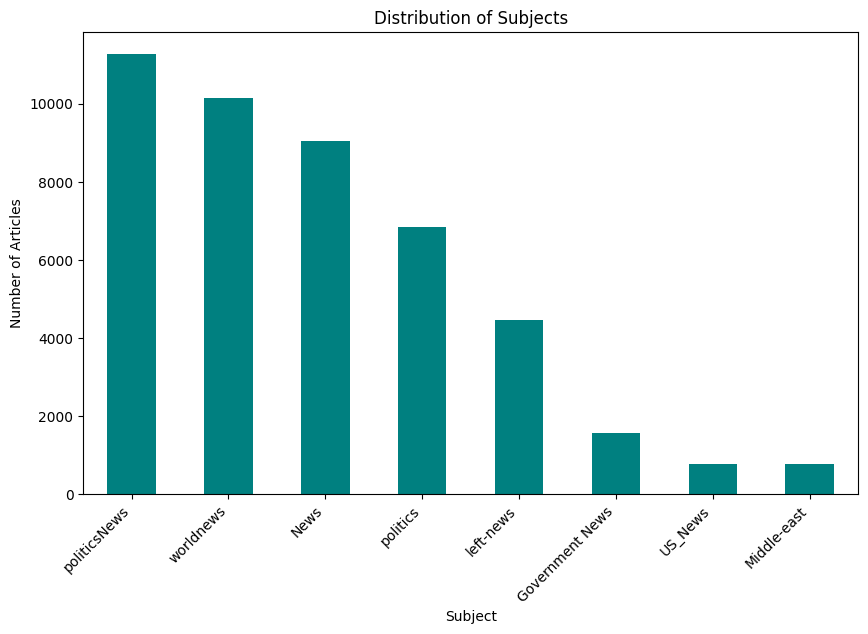

In [64]:
# Analyze the distribution of subjects
subject_distribution = my_isot_data['subject'].value_counts()

# Plot the distribution of subjects
plt.figure(figsize=(10, 6))
subject_distribution.plot(kind='bar', color='teal')      #'teal', 'crimson
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

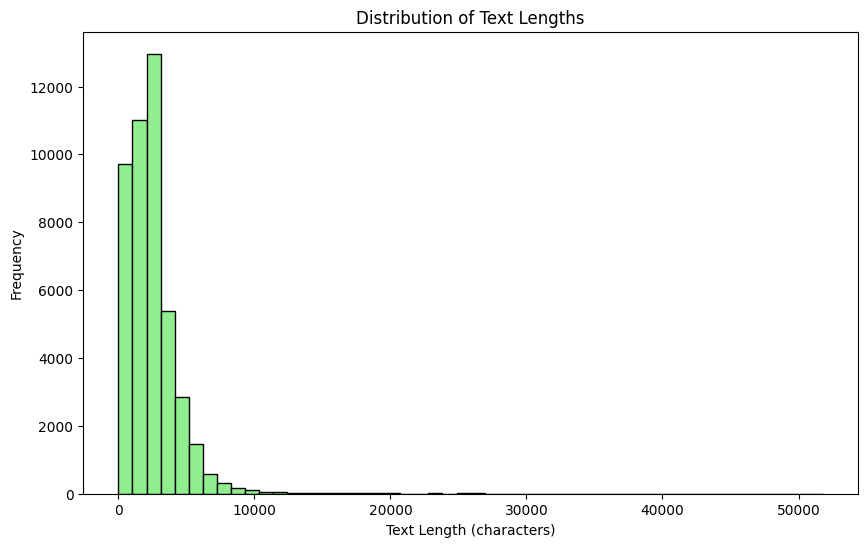

In [65]:
# Calculate the length of the text in each article
my_isot_data['text_length'] = my_isot_data['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
my_isot_data['text_length'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

## Checking for outliers

In [66]:
# Calculate the length of the title in each article
my_isot_data['title_length'] = my_isot_data['title'].apply(len)

# Calculate the length of the title in each article
my_isot_data['title_length'] = my_isot_data['title'].apply(len)


# Select relevant features for outlier detection
features = my_isot_data[['text_length','title_length']]

Using Z-score for outliers detection

In [67]:
# Calculate the Z-scores for the text_length and title_length
my_isot_data['text_length_zscore'] = (my_isot_data['text_length'] - my_isot_data['text_length'].mean()) / my_isot_data['text_length'].std()
my_isot_data['title_length_zscore'] = (my_isot_data['title_length'] - my_isot_data['title_length'].mean()) / my_isot_data['title_length'].std()

# Identify outliers as those with a Z-score greater than 3 or less than -3
zscore_outliers = my_isot_data[(np.abs(my_isot_data['text_length_zscore']) > 3) | (np.abs(my_isot_data['title_length_zscore']) > 3)]

print(f"Number of outliers detected by Z-score: {len(zscore_outliers)}")

Number of outliers detected by Z-score: 1264


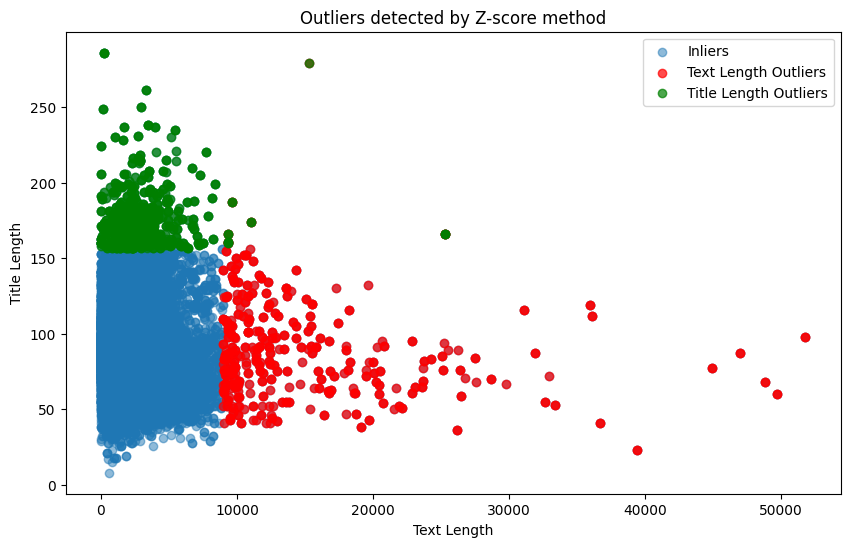

Z-score method: 495 text length outliers, 783 title length outliers


In [68]:
from scipy import stats
import numpy as np
# Z-score method to detect outliers
def z_score_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores > threshold]

# Detect outliers based on text length and title length using Z-score method
z_score_text_outliers = z_score_outliers(my_isot_data, 'text_length')
z_score_title_outliers = z_score_outliers(my_isot_data, 'title_length')

# Scatter plot to visualize Z-score method outliers
plt.figure(figsize=(10, 6))
plt.scatter(my_isot_data['text_length'], my_isot_data['title_length'], alpha=0.5, label='Inliers')
plt.scatter(z_score_text_outliers['text_length'], z_score_text_outliers['title_length'], color='red', alpha=0.7, label='Text Length Outliers')
plt.scatter(z_score_title_outliers['text_length'], z_score_title_outliers['title_length'], color='green', alpha=0.7, label='Title Length Outliers')
plt.title('Outliers detected by Z-score method')
plt.xlabel('Text Length')
plt.ylabel('Title Length')
plt.legend()
plt.show()

# Print summary of Z-score outliers
print(f"Z-score method: {len(z_score_text_outliers)} text length outliers, {len(z_score_title_outliers)} title length outliers")

Using Interquartile Range for outliers detections

In [ ]:
# Print summary of Z-score outliers
print(f"Z-score method: {len(z_score_text_outliers)} text length outliers, {len(z_score_title_outliers)} title length outliers")


Z-score method: 495 text length outliers, 783 title length outliers
IQR method: 1767 text length outliers, 2177 title length outliers


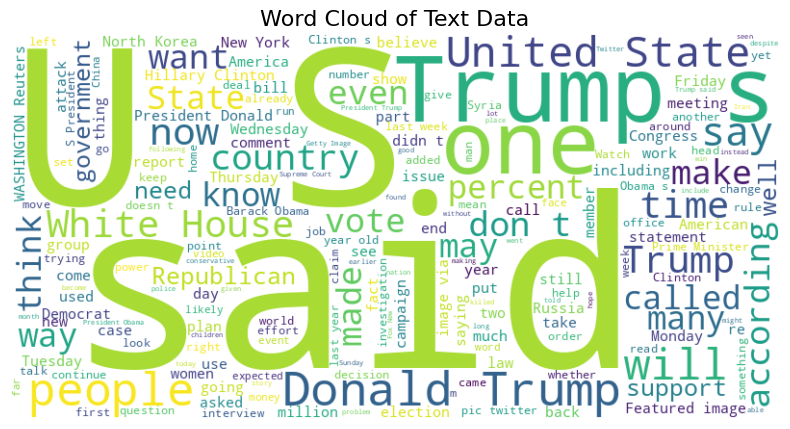

In [ ]:
from wordcloud import WordCloud


# Combine all text data into a single string
text_data = " ".join(text for text in my_isot_data['text'].dropna())

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, contour_color='steelblue').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()


In [ ]:
from wordcloud import WordCloud


# Filter the DataFrame to include only fake news articles
fake_news_text = my_isot_data[my_isot_data['label'] == 'fake']['text'].dropna()

# Combine all fake news text data into a single string
fake_text_data = " ".join(text for text in fake_news_text)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200, contour_color='crimson').generate(fake_text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.title('Word Cloud of Text Data from Fake News Articles', fontsize=16)

Text(0.5, 1.0, 'Word Cloud of Text Data from Fake News Articles')

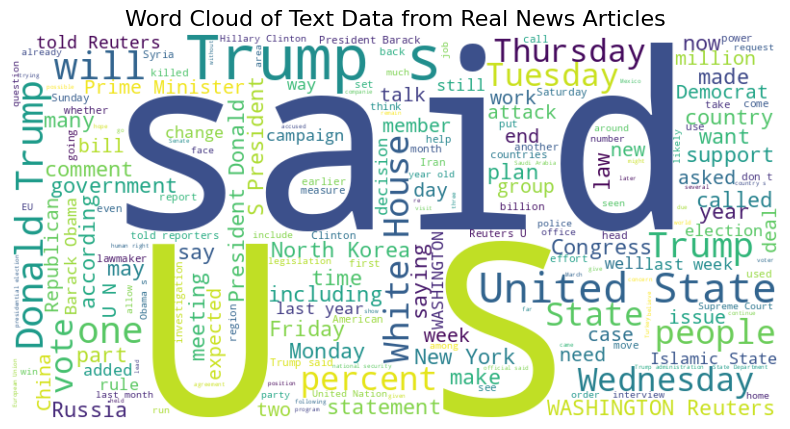

In [ ]:
from wordcloud import WordCloud


# Filter the DataFrame to include only real news articles
real_news_text = my_isot_data[my_isot_data['label'] == 'real']['text'].dropna()

# Combine all real news text data into a single string
real_text_data = " ".join(text for text in real_news_text)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200, contour_color='teal').generate(real_text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.title('Word Cloud of Text Data from Real News Articles', fontsize=16)
plt.show()

In [ ]:
#converting the date which is object to date type
#my_isot_data['date'] = pd.to_datetime(my_isot_data['date'], errors='coerce')

# Analyze the distribution of years from the date column
#year_distribution = my_isot_data['date'].dt.year.value_counts().sort_index()

# Plot the distribution of years
#plt.figure(figsize=(10, 6))
#year_distribution.plot(kind='bar', color='teal')
#plt.title('Distribution of Articles by Year')
#plt.xlabel('Year')
#plt.ylabel('Number of Articles')
#plt.xticks(rotation=45, ha='right')
#plt.show()


# DATA PREPROCESSING

1. Data cleaning

In [ ]:
# delete or dropping the duplicated rows of 209

# Remove duplicate rows, keeping the first occurrence
my_isot_data_cleaned = my_isot_data.drop_duplicates(keep='first')

# Check the shape of the dataframe before and after removing duplicates
print("Shape before removing duplicates:", my_isot_data.shape)
print("Shape after removing duplicates:", my_isot_data_cleaned.shape)


## verifying that the duplicated rows are removed

In [ ]:
# Check for any remaining duplicates
remaining_duplicates = my_isot_data_cleaned.duplicated().sum()
print("Number of remaining duplicate rows:", remaining_duplicates)

In [ ]:
# reseting the index to ensure the index have no gaps after removing duplicates

my_isot_data_cleaned = my_isot_data_cleaned.reset_index(drop=True)

print("Final shape of the cleaned dataframe:", my_isot_data_cleaned.shape)

In [ ]:
#Checking to see how many rows were removed
print("Rows per label before cleaning:")
print(my_isot_data['label'].value_counts())

print("\nRows per label after cleaning:")
print(my_isot_data_cleaned['label'].value_counts())

Verifying again

In [ ]:
# Identify exact duplicates
duplicate_mask = my_isot_data_cleaned.duplicated(keep=False)
exact_duplicates = my_isot_data_cleaned[duplicate_mask]

# Sort the duplicates to group them together
exact_duplicates_sorted = exact_duplicates.sort_values(by=exact_duplicates.columns.tolist())

# Display the number of exact duplicates
print(f"Number of exact duplicate rows including first occurence: {len(exact_duplicates)}")

# Display the first few duplicate entries
print("\nFirst few duplicate entries:")
print(exact_duplicates_sorted.head(10))  # Adjust the number as needed


Cleaning the duplicated text after cleaning the duplicated rows

In [ ]:

#Check for duplicates based text column before cleaning
content_duplicates = my_isot_data.duplicated(subset=['text']).sum()
print(f"Duplicates based on content(text) before cleaning: {content_duplicates}")


#Check for duplicates based text column after cleaning
content_duplicates1 = my_isot_data_cleaned.duplicated(subset=['text']).sum()
print(f"Duplicates based on content(text) after cleaning: {content_duplicates1}")

In [ ]:
#Cleaning duplicate text , keep the fisrt occurence
my_isot_data_cleaned = my_isot_data_cleaned.drop_duplicates(subset=['text'], keep='first')

my_isot_data_cleaned = my_isot_data_cleaned.reset_index(drop=True)

In [ ]:
#Check for duplicates based text column after cleaning
content_duplicates2 = my_isot_data_cleaned.duplicated(subset=['text']).sum()
print(f"Duplicates based on content(text) after cleaning: {content_duplicates2}")

In [ ]:
print("Rows per label before cleaning:")
print(my_isot_data['label'].value_counts().sort_index())

print("\nRows per label after cleaning duplicated rows and text:")
print(my_isot_data_cleaned['label'].value_counts().sort_index())

In [ ]:
# Before cleaning
print("Total rows before cleaning:", len(my_isot_data))
print("Duplicate rows before cleaning:", my_isot_data.duplicated(subset=['text']).sum())

# After cleaning
print("\nTotal rows after cleaning:", len(my_isot_data_cleaned))
print("Duplicate rows after cleaning:", my_isot_data_cleaned.duplicated(subset=['text']).sum())

In [ ]:
#verify the deduplication process
# Perform deduplication step by step
deduped = my_isot_data.drop_duplicates(subset=['text'], keep='first')
print("\nRows removed by deduplication:")
print(my_isot_data['label'].value_counts() - deduped['label'].value_counts())

In [ ]:
my_isot_data_cleaned.head()

Drop these columns- word_count,text_length,title_length,text_length_zscore	title_length_zscore,

In [ ]:
# List of columns to drop
columns_to_drop = ['word_count', 'text_length', 'title_length', 'text_length_zscore', 'title_length_zscore']

# Drop the specified columns
my_isot_data_cleaned= my_isot_data_cleaned.drop(columns=columns_to_drop)

Dealing with the  entries with zero words

In [ ]:
# Your current cleaned dataset
my_isot_data_cleaned = my_isot_data_cleaned[~my_isot_data_cleaned['text'].str.isspace() & (my_isot_data_cleaned['text'].str.strip() != '')]

# Print dataset sizes
print(f"Dataset size before removing whitespace entries: 38646")
print(f"Dataset size after removing whitespace entries: {len(my_isot_data_cleaned)}")
print(f"Number of removed whitespace entries: {38646 - len(my_isot_data_cleaned)}")

# Verify no more whitespace-only entries
whitespace_entries = my_isot_data_cleaned[my_isot_data_cleaned['text'].str.isspace()]
print(f"Remaining whitespace-only entries: {len(whitespace_entries)}")

# Check for empty strings after stripping
empty_after_strip = my_isot_data_cleaned[my_isot_data_cleaned['text'].str.strip() == '']
print(f"Empty strings after stripping: {len(empty_after_strip)}")

In [ ]:
# Saving the dataframe to my google
path = '/content/drive/MyDrive/ML/ISOT_cleaned.csv'
my_isot_data_cleaned.to_csv(path, index=False)

In [ ]:
ISOT_cleaned = pd.read_csv('/content/drive/MyDrive/ML/ISOT_cleaned.csv')

In [ ]:
ISOT_cleaned.head()

In [ ]:
ISOT_cleaned['label_num'].value_counts()

* Removing punctuations, ASCII characters and etc

* lemmetization,tokenization and stopwords

In [69]:
# Data Preprocessing continues

import re  #import RegEX
import spacy # import spaCy library
# Load the Spacy model for English
nlp = spacy.load('en_core_web_sm')
import string

In [ ]:
# implementing and testing tokenization,lemmetization and stopwords
# Sample text
text = "Donald Trump has been crowned 2016 Person of the Year by Time Magazine."

# Process the text with spaCy to create a Doc object
doc = nlp(text)

# Extract and print tokens
tokens = [token.text for token in doc]
print(tokens)



In [ ]:
# stops words
stopwords = [token.text for token in doc if token.is_stop]
print("Stopwords in the text:", stopwords)

In [ ]:
# Extract and print lemmas
lemmas = [token.lemma_ for token in doc]
print("Lemmas:", lemmas)

In [ ]:
#checking the content of text column
ISOT_cleaned['text'].iloc[0]

In [ ]:
# Extract stopwords from the first entry (iloc[0]) in the 'text' column
first_news_article = ISOT_cleaned['text'].iloc[0]


# Process the text to extract stopwords
doc = nlp(first_news_article)
stopwords_in_first_text = [token.text for token in doc if token.is_stop]
stopwords_in_first_text


In [ ]:
ISOT_cleaned['text'].iloc[-23]


## the text column contains extraneous information as username,urls, special characters etc, sample is shown above

In [70]:


def preprocess_text(text):
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove standard URLs (e.g., http://example.com)
    text = re.sub(r'http\S+', '', text)

    # Remove Twitter URLs (e.g., pic.twitter.com0gxjuhjpxs)
    text = re.sub(r'pic.twitter.com\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # If text is empty after cleaning, return empty string
    if not text:
        return ""

    # Lemmatization and stopword removal
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join the tokens back into a single string
    return ' '.join(tokens) if tokens else ""

In [ ]:
# Apply the preprocessing function
ISOT_cleaned['cleaned_text'] = ISOT_cleaned['text'].apply(preprocess_text)

# Remove entries where cleaned_text is empty
ISOT_cleaned = ISOT_cleaned[ISOT_cleaned['cleaned_text'] != '']

# Print the shape of the dataframe after preprocessing
print(f"Shape of dataframe after preprocessing: {ISOT_cleaned.shape}")

# Optional: Print a few examples to verify
print("\nSample of preprocessed texts:")
for _, row in ISOT_cleaned.head().iterrows():
    print(f"Original: {row['text'][:100]}...")
    print(f"Cleaned: {row['cleaned_text']}")
    print()

## use it to apply the preprocess function

In [ ]:
# Apply the preprocessing function and check for issues
#ISOT_cleaned['cleaned_text'] = ISOT_cleaned['text'].apply(preprocess_text)

# Check for empty strings after preprocessing
#empty_after_preprocessing = (ISOT_cleaned['cleaned_text'] == '').sum()
#print(f"Empty strings after preprocessing: {empty_after_preprocessing}")

# Remove rows with empty cleaned_text
#ISOT_cleaned = ISOT_cleaned[ISOT_cleaned['cleaned_text'] != '']

# Print the shape of the dataframe after removal
#print(f"Shape of dataframe after removing empty cleaned_text: {ISOT_cleaned.shape}")

In [71]:
#testing to see the results will change with duplication
my_isot_data['processed_text']=my_isot_data['text'].apply(preprocess_text)


In [72]:
print("NaN values in processed_text:", my_isot_data['processed_text'].isna().sum())

NaN values in processed_text: 0


In [73]:
path='/content/drive/MyDrive/ML/my_isot_data.csv'
my_isot_data.to_csv(path, index=False)

# experiment with all the data inconsistencies including duplications

In [74]:
from sklearn.model_selection import train_test_split
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(
    my_isot_data['processed_text'],                                    # independent variable(x)
    my_isot_data['label_num'],                                       # dependent variable(target variable)
    test_size=0.3,                                                         # 70% training, 30% testing
    random_state=2024,                                                     # for reproducibility
    stratify=my_isot_data['label_num']
)

In [79]:
# Initialize and fit TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_dtrain)
X_test_tfidf = tfidf.transform(X_dtest)

In [80]:
print("Shape of X_train: ", X_dtrain.shape)
print("Shape of X_test: ", X_dtest.shape)
print("Shape of y_train: ", y_dtrain.shape)
print("Shape of y_test: ", y_dtest.shape)

Shape of X_train:  (31428,)
Shape of X_test:  (13470,)
Shape of y_train:  (31428,)
Shape of y_test:  (13470,)


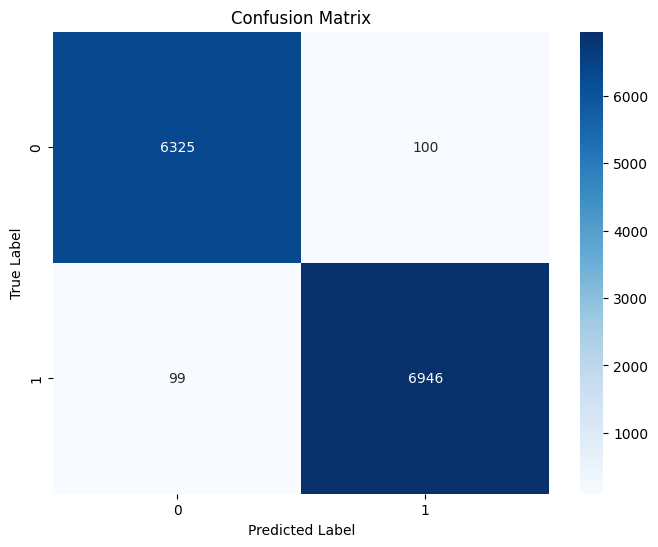

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14992
           1       0.99      0.99      0.99     16436

    accuracy                           0.99     31428
   macro avg       0.99      0.99      0.99     31428
weighted avg       0.99      0.99      0.99     31428


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6425
           1       0.99      0.99      0.99      7045

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


Top 10 most important features:
say: -19.51915245013235
reuter: -19.337381759157136
reuters: -16.190618143677508
trumps: -8.629649018393545
image: 7.383385267771686
not: -7.230040818090072
washington: -6.214842216507556
wednesday: -5.902629907150106
thursday: -5.5657567963471

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split

# Initialize and train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_dtrain)

# Make predictions on training and test sets
y_train_pred = lr.predict(X_train_tfidf)
y_test_pred = lr.predict(X_test_tfidf)

# Plot confusion matrix for the test set
cm = confusion_matrix(y_dtest, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_dtrain, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_dtest, y_test_pred))

# Print top features
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]
top_features = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]

print("\nTop 10 most important features:")
for coef, feature in top_features:
    print(f"{feature}: {coef}")


Logistic Regression


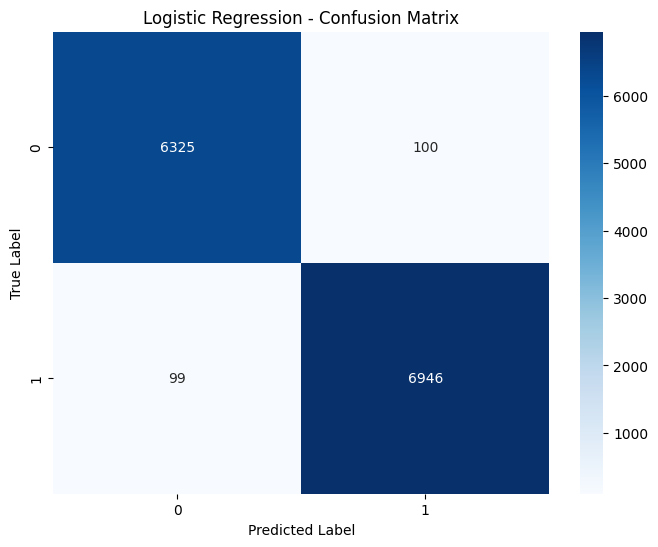

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14992
           1       0.99      0.99      0.99     16436

    accuracy                           0.99     31428
   macro avg       0.99      0.99      0.99     31428
weighted avg       0.99      0.99      0.99     31428


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6425
           1       0.99      0.99      0.99      7045

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


Random Forest


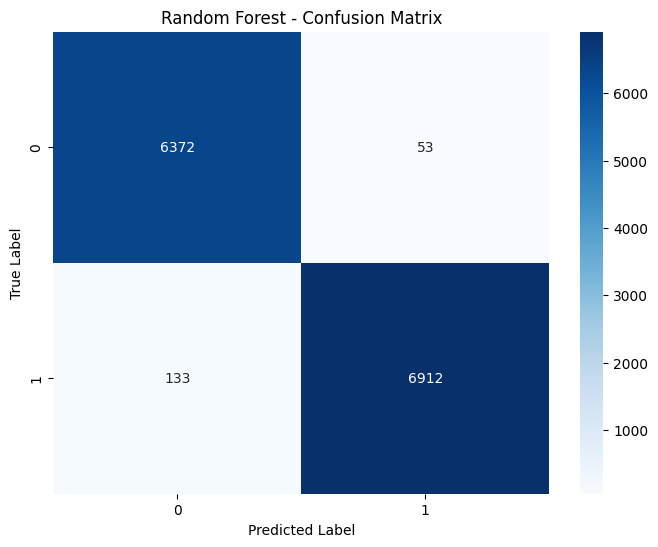

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14992
           1       1.00      1.00      1.00     16436

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6425
           1       0.99      0.98      0.99      7045

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


Decision Tree


Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14992
           1       1.00      1.00      1.00     16436

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428


Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6425
           1       1.00      1.00      1.00      7045

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470


SVM


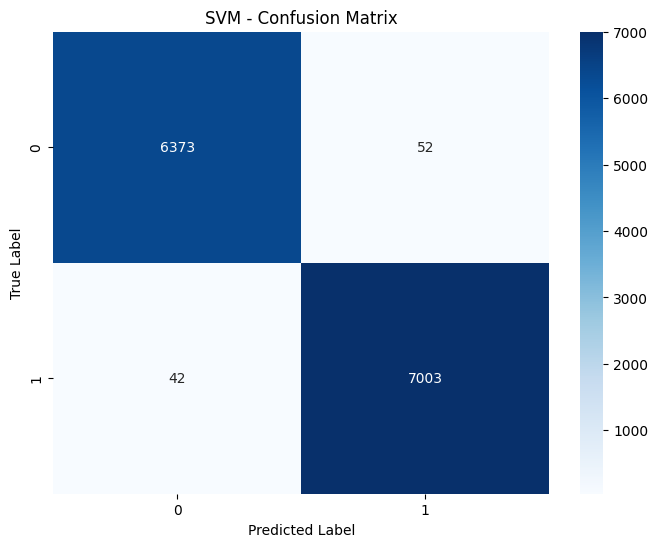

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14992
           1       1.00      1.00      1.00     16436

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6425
           1       0.99      0.99      0.99      7045

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [83]:

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(random_state=42))

]

for name, clf in classifiers:
    print(f"\n{name}")

    # Train the model
    clf.fit(X_train_tfidf, y_dtrain)

    # Make predictions
    y_train_pred = clf.predict(X_train_tfidf)
    y_test_pred = clf.predict(X_test_tfidf)

    # Plot confusion matrix for the test set
    cm = confusion_matrix(y_dtest, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification reports
    print("Training Set Classification Report:")
    print(classification_report(y_dtrain, y_train_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(y_dtest, y_test_pred))




In [ ]:
# Check for NaN values
print("NaN values in cleaned_text:", ISOT_cleaned['cleaned_text'].isna().sum())
print("NaN values in label_num:", ISOT_cleaned['label_num'].isna().sum())

In [ ]:
# Remove rows with NaN values
#ISOT_cleaned_ready = ISOT_cleaned.dropna(subset=['cleaned_text', 'label_num'])

In [ ]:
# Saving the dataframe to my google
path = '/content/drive/MyDrive/ML/ISOT_cleaned_ready.csv'
ISOT_cleaned.to_csv(path, index=False)

In [2]:
import pandas as pd
#load dataset for training the models
ISOT_cleaned_ready = pd.read_csv('/content/drive/MyDrive/ML/ISOT_cleaned_ready.csv')

In [ ]:
ISOT_cleaned_ready.head()

title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date label  label_num  \
0    February 13, 2017  fake          1   
1       April 5, 2017   real          0   
2  September 27, 2017   real          0   
3         May 22, 2017  fake          1   
4       June 24, 2016   real          0   

                                        cleaned_text  
0  21st century wire say ben stein reputable prof...  
1  washington reuter president donald trump remov...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrass country accident...  
4  glasgow scotland reuter presidential candidate...

In [ ]:
ISOT_cleaned_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38591 non-null  object
 1   text          38591 non-null  object
 2   subject       38591 non-null  object
 3   date          38591 non-null  object
 4   label         38591 non-null  object
 5   label_num     38591 non-null  int64 
 6   cleaned_text  38591 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
print("Original text:")
print(ISOT_cleaned['text'].iloc[-23])
print("\nCleaned text:")
print(ISOT_cleaned_ready['cleaned_text'].iloc[-23])

Original text:


NameError: name 'ISOT_cleaned' is not defined

Now my dataset is ready to be used for training

In [ ]:
ISOT_cleaned_ready['label_num'].value_counts()

## Using the clean data for the modelling

**1st Experiment**

*   80% -30% train test split
*   Using TF-IDF
*   ML Models (LR,RF,DT,SVM)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    ISOT_cleaned_ready['cleaned_text'],                                    # independent variable(x)
    ISOT_cleaned_ready['label_num'],                                       # dependent variable(target variable)
    test_size=0.3,                                                         # 70% training, 30% testing
    random_state=2024,                                                     # for reproducibility
    stratify=ISOT_cleaned_ready['label_num']
)

## Transforming the data into TF-IDF features

In [5]:
# Initialize and fit TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (27013,)
Shape of X_test:  (11578,)
Shape of y_train:  (27013,)
Shape of y_test:  (11578,)


## Using Logistic Regression with TF-IDF

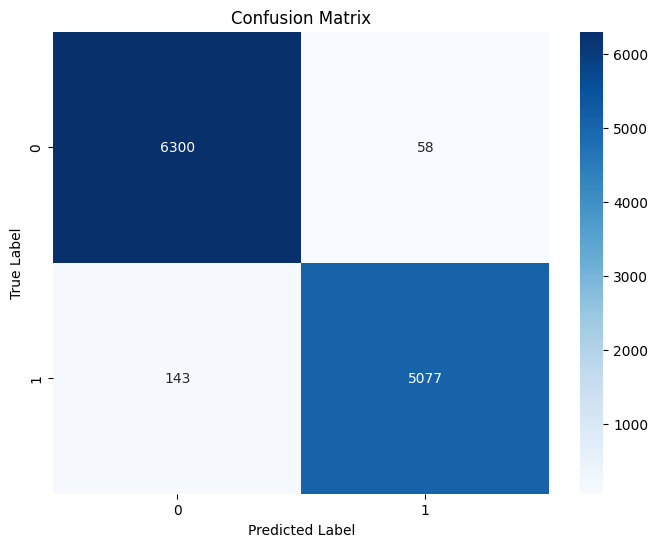

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14833
           1       0.99      0.99      0.99     12180

    accuracy                           0.99     27013
   macro avg       0.99      0.99      0.99     27013
weighted avg       0.99      0.99      0.99     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6358
           1       0.99      0.97      0.98      5220

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578


Top 10 most important features:
say: -18.62953442211644
reuter: -16.63643382272052
reuters: -13.957948128938614
image: 8.873924287621655
trumps: -8.107252175639339
not: -7.234083684961132
washington: -6.104800038627929
wednesday: -5.561877211267213
tuesday: -5.219733262770777

In [ ]:


# Initialize and train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train)

# Make predictions on training and test sets
y_train_pred = lr.predict(X_train_tfidf)
y_test_pred = lr.predict(X_test_tfidf)

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print top features
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]
top_features = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]

print("\nTop 10 most important features:")
for coef, feature in top_features:
    print(f"{feature}: {coef}")

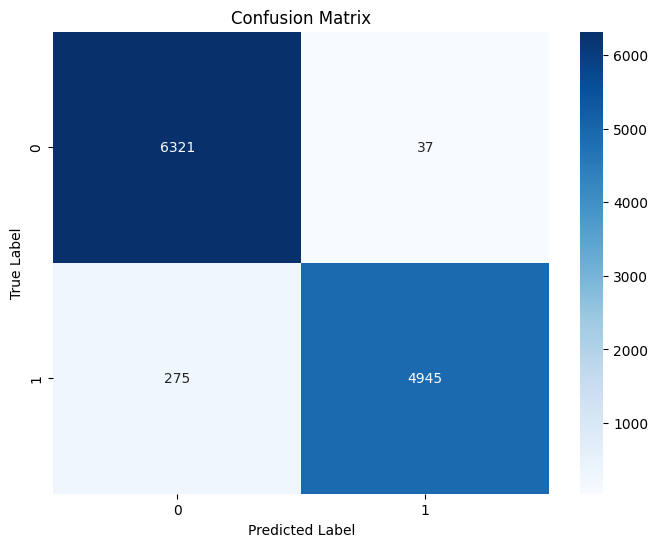

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6358
           1       0.99      0.95      0.97      5220

    accuracy                           0.97     11578
   macro avg       0.98      0.97      0.97     11578
weighted avg       0.97      0.97      0.97     11578


Top 10 most important features:
say: 0.024303256075382286
reuter: 0.024167793317655378
reuters: 0.023607752072773342
image: 0.010303173524091809
trumps: 0.00930895917478058
washington: 0.00842448067857487
wednesday: 0.007145227494984725
doesn: 0.006957333654254224
didn: 0.006

In [ ]:



rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train)

# Make predictions on training and test sets
y_train_pred = rf.predict(X_train_tfidf)
y_test_pred = rf.predict(X_test_tfidf)

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

feature_names = tfidf.get_feature_names_out()
importances = rf.feature_importances_
top_features = sorted(zip(importances, feature_names), key=lambda x: x[0], reverse=True)[:10]

print("\nTop 10 most important features:")
for importance, feature in top_features:
    print(f"{feature}: {importance}")

## using TF-IDF SVM,DT,LR and RF cross validation


Logistic Regression


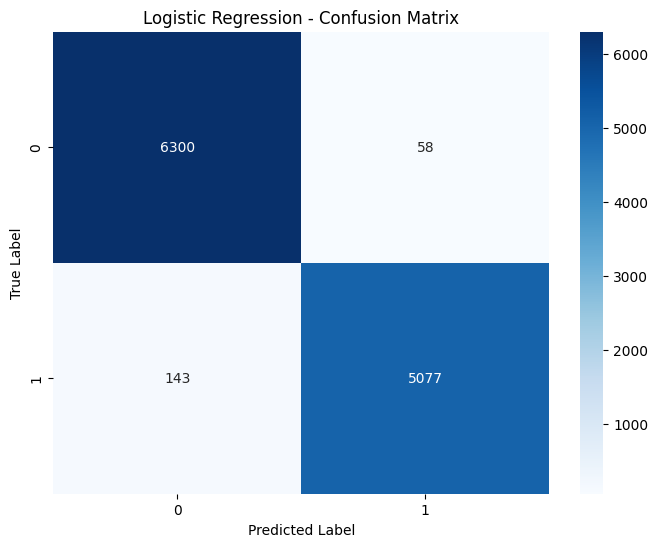

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14833
           1       0.99      0.99      0.99     12180

    accuracy                           0.99     27013
   macro avg       0.99      0.99      0.99     27013
weighted avg       0.99      0.99      0.99     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6358
           1       0.99      0.97      0.98      5220

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578


Random Forest


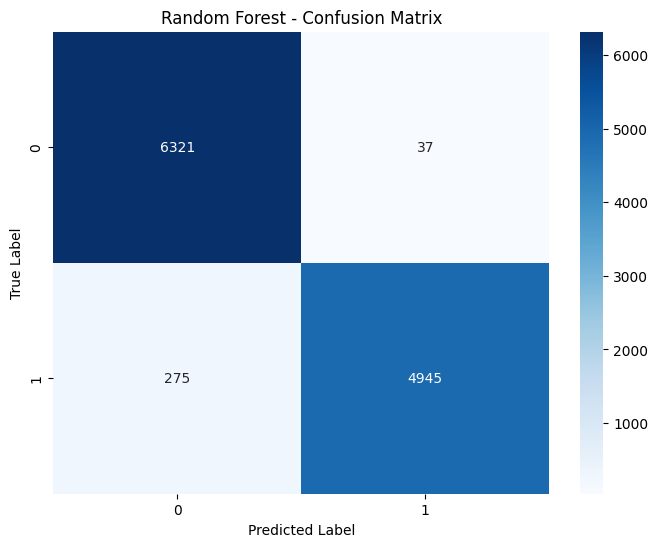

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6358
           1       0.99      0.95      0.97      5220

    accuracy                           0.97     11578
   macro avg       0.98      0.97      0.97     11578
weighted avg       0.97      0.97      0.97     11578


Decision Tree


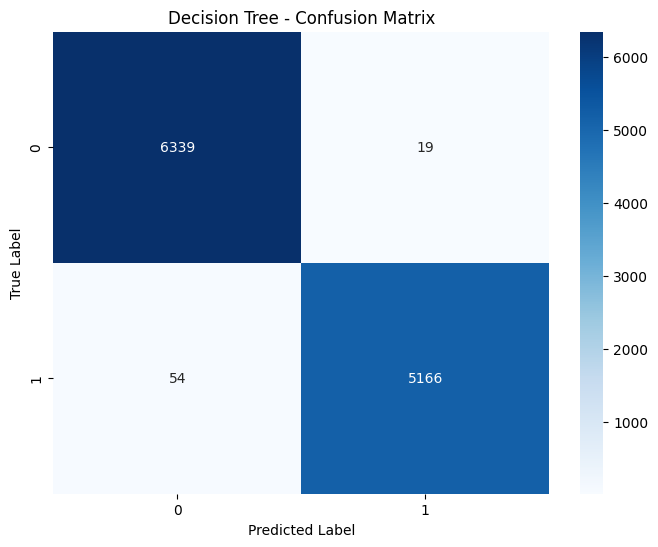

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578


SVM


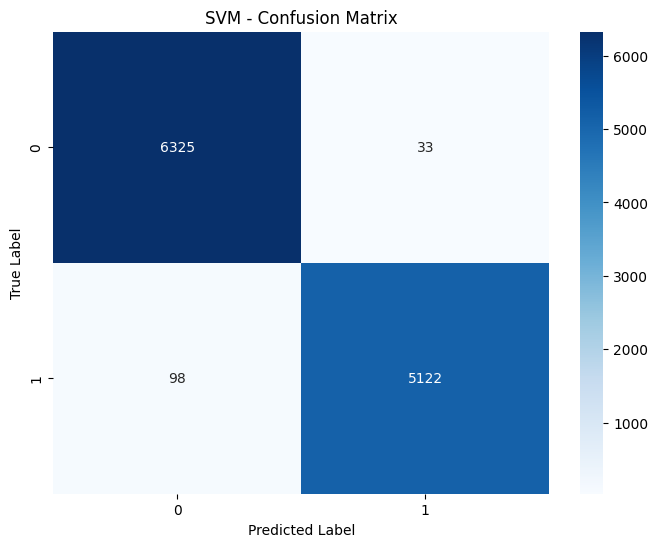

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6358
           1       0.99      0.98      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578



In [ ]:

# Initialize and fit TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(random_state=42))

]

for name, clf in classifiers:
    print(f"\n{name}")

    # Train the model
    clf.fit(X_train_tfidf, y_train)

    # Make predictions
    y_train_pred = clf.predict(X_train_tfidf)
    y_test_pred = clf.predict(X_test_tfidf)

    # Plot confusion matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification reports
    print("Training Set Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))




Random Forest

Using TF-IDF with cross validation

In [ ]:

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
]

# Number of cross-validation folds
for name, clf in classifiers:
    print(f"\n{name}")

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train_tfidf, y_train, cv=5, scoring='accuracy')

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Train the model
    clf.fit(X_train_tfidf, y_train)

    # Calculate training score
    train_score = clf.score(X_train_tfidf, y_train)
    print(f"Training accuracy: {train_score:.4f}")

    # Calculate the difference
    difference = train_score - cv_scores.mean()
    print("Difference (Training - CV): {:.3f}".format(difference))

    # Interpret the results
    if difference > 0.1:
        print("Warning: Potential overfitting detected.")
    else:
        print("No significant overfitting detected.")

    # Make predictions
    y_train_pred = clf.predict(X_train_tfidf)
    y_test_pred = clf.predict(X_test_tfidf)

    # Print classification reports
    print("\nTraining Set Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot confusion matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Test Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Logistic Regression
Cross-validation scores: [0.98389783 0.98463816 0.98500833 0.98167345 0.98796742]
Mean CV accuracy: 0.9846 (+/- 0.0041)
Training accuracy: 0.9911
Difference (Training - CV): 0.006
No significant overfitting detected.

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14833
           1       0.99      0.99      0.99     12180

    accuracy                           0.99     27013
   macro avg       0.99      0.99      0.99     27013
weighted avg       0.99      0.99      0.99     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6358
           1       0.99      0.97      0.98      5220

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578




Random Forest


# USING THE RANDOM SAMPLING TO CHECK IF THE RESULTS WILL BE SIMILIAR RESULTS

In [ ]:
ISOT_cleaned_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38591 non-null  object
 1   text          38591 non-null  object
 2   subject       38591 non-null  object
 3   date          38591 non-null  object
 4   label         38591 non-null  object
 5   label_num     38591 non-null  int64 
 6   cleaned_text  38591 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
ISOT_cleaned_ready['cleaned_text'].iloc[0]

'21st century wire say ben stein reputable professor pepperdine university hollywood fame appear tv show film ferris bueller s day provocative statement judge jeanine pirro s recently discuss halt impose president trump s executive order travel stein refer judgement 9th circuit court washington state coup d tat executive branch constitution stein go judge seattle political puppet judiciary political pawn watch interview complete statement note stark contrast rhetoric leftist medium pundit neglect note court block presidential order immigration past discuss legal efficacy halt actual text executive orderread trump news 21st century wire trump filessupport work subscribe member tv'

In [ ]:

#Creating a random sample from the full dataset
sample_size = 0.1  # 10% of the data
sampled_data = ISOT_cleaned_ready.sample(frac=sample_size, random_state=2024)


X_sample = sampled_data['cleaned_text']
y_sample = sampled_data['label_num']

#Train-test split of the sampled dataset
XS_train, XS_test, yS_train, yS_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42,stratify=sampled_data['label_num'])


In [ ]:
#Creating classes distribution
print(sampled_data.label_num.value_counts())

# Printing to see distribution
print('X_train',XS_train.shape)
print('X_test',XS_test.shape)
print('y_train',yS_train.shape)
print('y_test',yS_test.shape)

label_num
0    2096
1    1763
Name: count, dtype: int64
X_train (2701,)
X_test (1158,)
y_train (2701,)
y_test (1158,)


Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      2701
   macro avg       1.00      1.00      1.00      2701
weighted avg       1.00      1.00      1.00      2701

Training accuracy: 0.9996

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       629
           1       0.98      0.95      0.96       529

    accuracy                           0.97      1158
   macro avg       0.97      0.97      0.97      1158
weighted avg       0.97      0.97      0.97      1158

Test accuracy: 0.9680


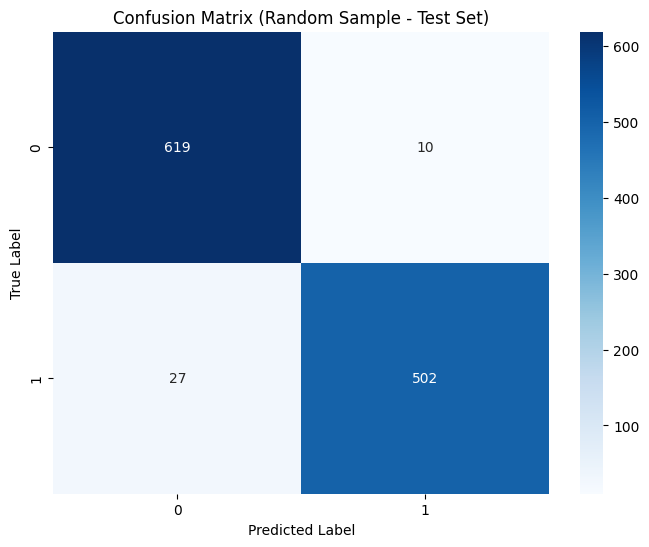

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(XS_train)
X_test_vec = vectorizer.transform(XS_test)

# Initialize and train SVM
svm = SVC(random_state=42)
svm.fit(X_train_vec, yS_train)

# Make predictions on training set
y_train_pred = svm.predict(X_train_vec)

# Print training classification report
print("Training Set Classification Report:")
print(classification_report(yS_train, y_train_pred))

# Calculate and print training accuracy
train_score = svm.score(X_train_vec, yS_train)
print(f"Training accuracy: {train_score:.4f}")

# Make predictions on test set
y_test_pred = svm.predict(X_test_vec)

# Print test classification report
print("\nTest Set Classification Report:")
print(classification_report(yS_test, y_test_pred))

# Calculate and print test accuracy
test_score = svm.score(X_test_vec, yS_test)
print(f"Test accuracy: {test_score:.4f}")

# Plot confusion matrix for test set
cm = confusion_matrix(yS_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Sample - Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


SVM Classifier:
Cross-validation scores: [0.96487985 0.96481481 0.97592593 0.97407407 0.96481481]
Mean CV accuracy: 0.9689 (+/- 0.0100)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      2701
   macro avg       1.00      1.00      1.00      2701
weighted avg       1.00      1.00      1.00      2701

Training accuracy: 0.9996

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       629
           1       0.98      0.95      0.96       529

    accuracy                           0.97      1158
   macro avg       0.97      0.97      0.97      1158
weighted avg       0.97      0.97      0.97      1158

Test accuracy: 0.9680


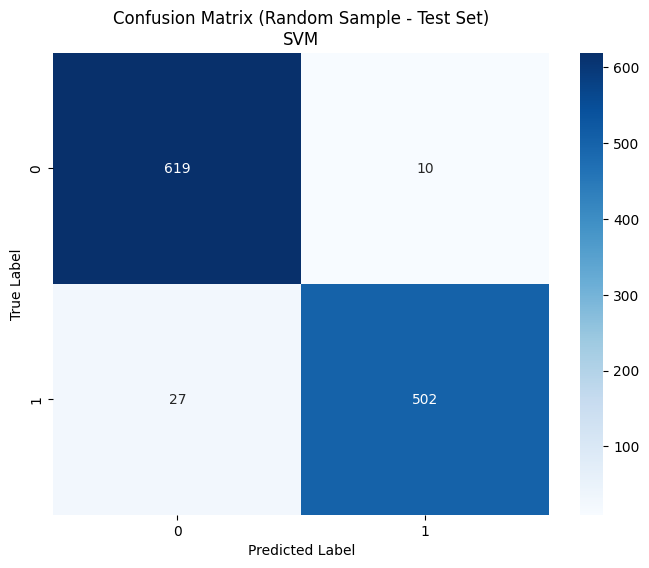

No significant overfitting detected.

Decision Tree Classifier:
Cross-validation scores: [0.98336414 0.98703704 0.98888889 0.98888889 0.99259259]
Mean CV accuracy: 0.9882 (+/- 0.0060)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      2701
   macro avg       1.00      1.00      1.00      2701
weighted avg       1.00      1.00      1.00      2701

Training accuracy: 1.0000

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       629
           1       0.99      1.00      0.99       529

    accuracy                           0.99      1158
   macro avg       0.99      0.99      0.99      1158
weighted avg       0.99      0.99      0.99      1158

Test accuracy: 0.9914


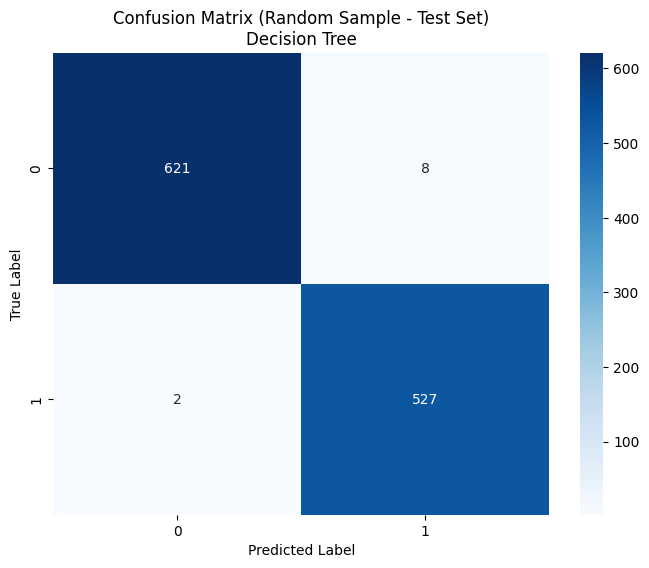

No significant overfitting detected.

Random Forest Classifier:
Cross-validation scores: [0.96487985 0.95925926 0.97407407 0.96851852 0.96666667]
Mean CV accuracy: 0.9667 (+/- 0.0096)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      2701
   macro avg       1.00      1.00      1.00      2701
weighted avg       1.00      1.00      1.00      2701

Training accuracy: 1.0000

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       629
           1       0.98      0.93      0.96       529

    accuracy                           0.96      1158
   macro avg       0.96      0.96      0.96      1158
weighted avg       0.96      0.96      0.96      1158

Test accuracy: 0.9620


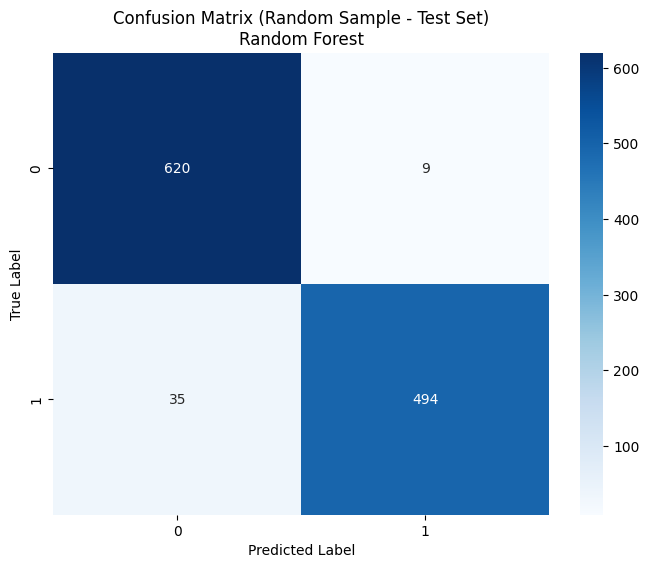

No significant overfitting detected.

Logistic Regression Classifier:
Cross-validation scores: [0.95933457 0.95925926 0.96111111 0.95925926 0.95740741]
Mean CV accuracy: 0.9593 (+/- 0.0023)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1467
           1       0.99      0.98      0.99      1234

    accuracy                           0.99      2701
   macro avg       0.99      0.99      0.99      2701
weighted avg       0.99      0.99      0.99      2701

Training accuracy: 0.9870

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       629
           1       0.98      0.94      0.96       529

    accuracy                           0.96      1158
   macro avg       0.96      0.96      0.96      1158
weighted avg       0.96      0.96      0.96      1158

Test accuracy: 0.9620


No significant overfitting detected.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(XS_train)
X_test_vec = vectorizer.transform(XS_test)

# Initialize classifiers
classifiers = {
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

for name, clf in classifiers.items():
    print(f"\n{name} Classifier:")

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train_vec, yS_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

    # Train classifier on the entire training set
    clf.fit(X_train_vec, yS_train)

    # Make predictions on training set
    y_train_pred = clf.predict(X_train_vec)

    # Print training classification report
    print("\nTraining Set Classification Report:")
    print(classification_report(yS_train, y_train_pred))

    # Calculate and print training accuracy
    train_score = clf.score(X_train_vec, yS_train)
    print(f"Training accuracy: {train_score:.4f}")

    # Make predictions on test set
    y_test_pred = clf.predict(X_test_vec)

    # Print test classification report
    print("\nTest Set Classification Report:")
    print(classification_report(yS_test, y_test_pred))

    # Calculate and print test accuracy
    test_score = clf.score(X_test_vec, yS_test)
    print(f"Test accuracy: {test_score:.4f}")

    # Plot confusion matrix for test set
    cm = confusion_matrix(yS_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Random Sample - Test Set)\n{name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Check for potential overfitting
    if train_score - np.mean(cv_scores) > 0.05:
        print("Warning: Potential overfitting detected.")
    else:
        print("No significant overfitting detected.")

Cross-validation scores: [0.98704663 0.98186528 0.98186528 0.97409326 0.98184176]
Mean CV score: 0.9813 (+/- 0.0083)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      2701
   macro avg       1.00      1.00      1.00      2701
weighted avg       1.00      1.00      1.00      2701


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       629
           1       0.99      0.97      0.98       529

    accuracy                           0.98      1158
   macro avg       0.98      0.98      0.98      1158
weighted avg       0.98      0.98      0.98      1158



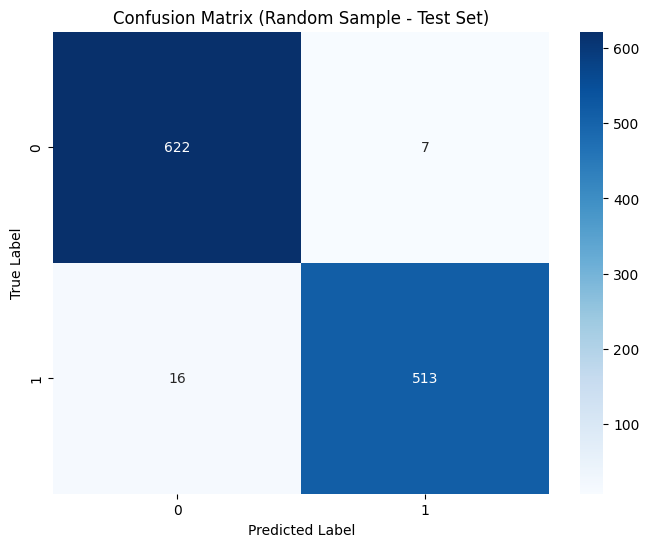

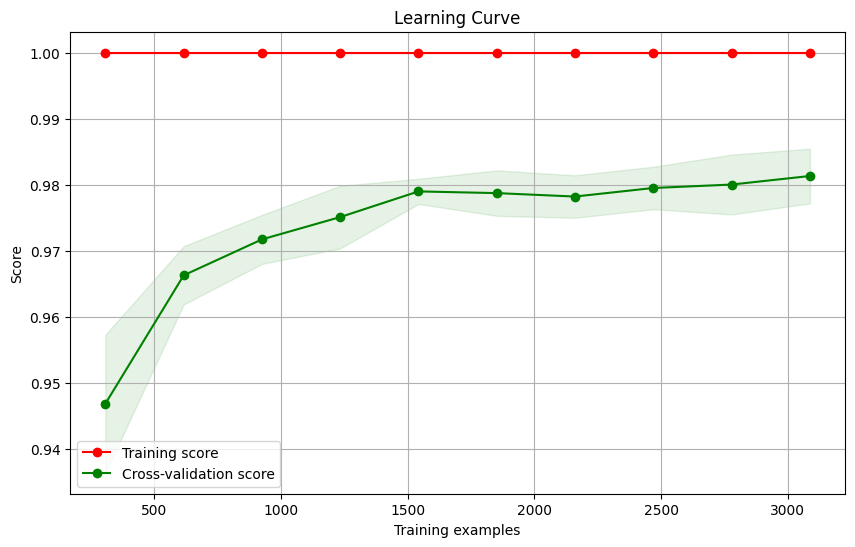

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_sample_vec = vectorizer.fit_transform(X_sample)
X_train_vec = vectorizer.transform(XS_train)
X_test_vec = vectorizer.transform(XS_test)

# Initialize SVM with C=10 and linear kernel
svm = SVC(kernel='linear', C=10, random_state=42)

# Cross-validation
cv_scores = cross_val_score(svm, X_sample_vec, y_sample, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train the model on the training set
svm.fit(X_train_vec, yS_train)

# Evaluate on training set
y_train_pred = svm.predict(X_train_vec)
print("\nTraining Set Classification Report:")
print(classification_report(yS_train, y_train_pred))

# Evaluate on test set
y_test_pred = svm.predict(X_test_vec)
print("\nTest Set Classification Report:")
print(classification_report(yS_test, y_test_pred))

# Plot confusion matrix for test set
cm = confusion_matrix(yS_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Sample - Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



# Using the clean data with GridSearch

Using regurlarization techniques to prevent overfitting

Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_lr = {'C': [0.1, 1, 10]}

# Initialize the model
lr = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best CV accuracy for Logistic Regression:", grid_search_lr.best_score_)

Cross-validation scores: [0.98963539 0.99019063 0.98963539 0.98722695 0.99129952]
Mean CV accuracy: 0.9896 (+/- 0.0027)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6358
           1       0.99      0.98      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578



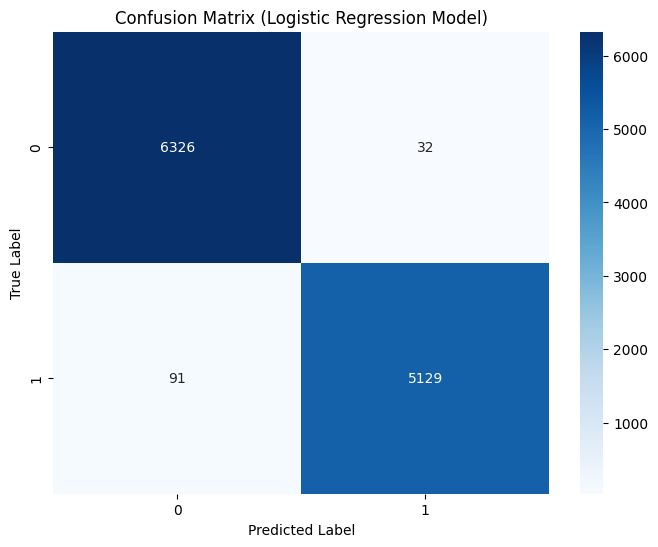


Top 10 most important features (Logistic Regression Model):
reuter: -38.0069
reuters: -32.3791
say: -28.6773
trumps: -16.2291
image: 16.1418
not: -16.0074
washington: -9.8925
wednesday: -9.7707
don: 9.5238
gop: 8.7778

Training Accuracy: 0.9994
Test Accuracy: 0.9894
No significant overfitting detected.


In [ ]:

# Initialize the Logistic Regression model with the best parameter
best_lr = LogisticRegression(C=10, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_lr, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on the training data
best_lr.fit(X_train_tfidf, y_train)

# Make predictions on the training and test sets
y_train_pred = best_lr.predict(X_train_tfidf)
y_test_pred = best_lr.predict(X_test_tfidf)

# Print classification reports
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print top features for the best model
feature_names = tfidf.get_feature_names_out()
coefficients = best_lr.coef_[0]
top_features = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]

print("\nTop 10 most important features (Logistic Regression Model):")
for coef, feature in top_features:
    print(f"{feature}: {coef:.4f}")

# Calculate and print accuracies
train_accuracy = best_lr.score(X_train_tfidf, y_train)
test_accuracy = best_lr.score(X_test_tfidf, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for potential overfitting
if train_accuracy - cv_scores.mean() > 0.05:
    print("Warning: Potential overfitting detected.")
else:
    print("No significant overfitting detected.")

Random Forest finding optinum value of N-estimators

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],

}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'min_samples_leaf': 1, 'n_estimators': 200}
Best CV accuracy for Random Forest: 0.9772332592113079


Best parameters: {'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9772
Cross-validation scores: [0.97445863 0.97667962 0.97853045 0.97667531 0.97982229]
Mean CV accuracy: 0.9772 (+/- 0.0037)

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6358
           1       0.99      0.95      0.97      5220

    accuracy                           0.98     11578
   macro avg       0.98      0.97      0.98     11578
weighted avg       0.98      0.98      0.98     11578



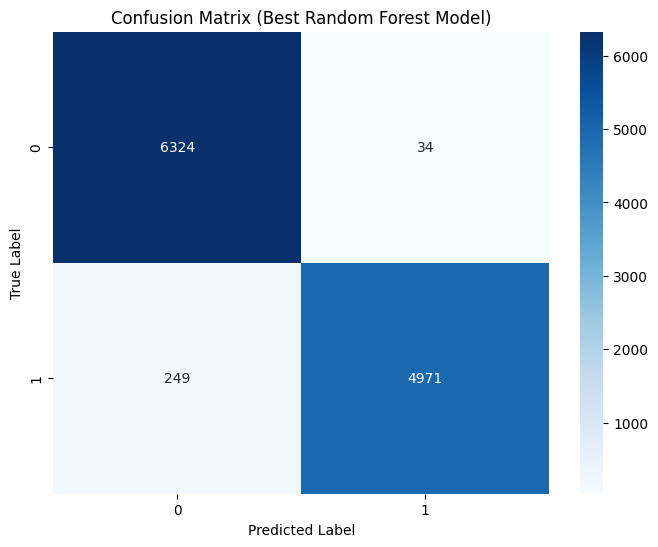


Training Accuracy: 1.0000
Test Accuracy: 0.9756
Mean CV Accuracy: 0.9772


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_rf = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the best model on the training data
best_rf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_test_pred = best_rf.predict(X_test_tfidf)

# Print classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best Random Forest Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print accuracies
train_accuracy = best_rf.score(X_train_tfidf, y_train)
test_accuracy = best_rf.score(X_test_tfidf, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

SVM

Best parameters: {'C': 10}
Best cross-validation score: 0.9923
Cross-validation scores: [0.99241162 0.9937072  0.99204146 0.98981859 0.99370603]
Mean CV accuracy: 0.9923 (+/- 0.0029)

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578



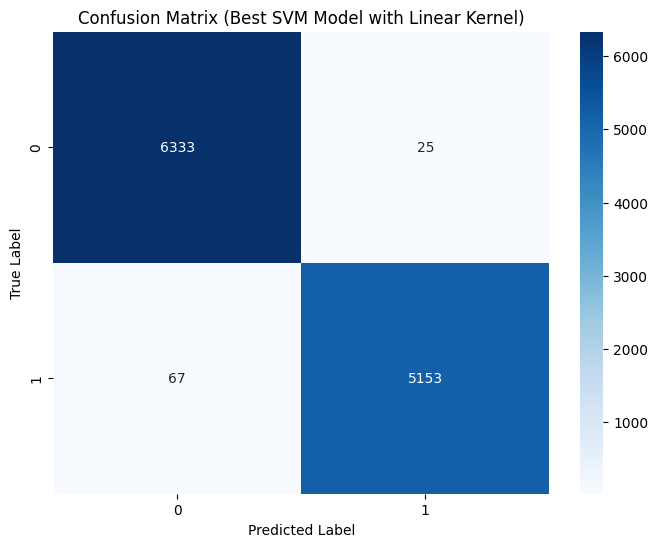


Training Accuracy: 1.0000
Test Accuracy: 0.9921
Mean CV Accuracy: 0.9923


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10]
}

# Initialize the SVM classifier with linear kernel
svm = SVC(kernel='linear', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_svm = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_svm, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the best model on the training data
best_svm.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_test_pred = best_svm.predict(X_test_tfidf)

# Print classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best SVM Model with Linear Kernel)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print accuracies
train_accuracy = best_svm.score(X_train_tfidf, y_train)
test_accuracy = best_svm.score(X_test_tfidf, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.99167129 0.99241162 0.99167129 0.98944835 0.99296557]
Mean CV accuracy: 0.9916 (+/- 0.0024)

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       0.99      0.99      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578



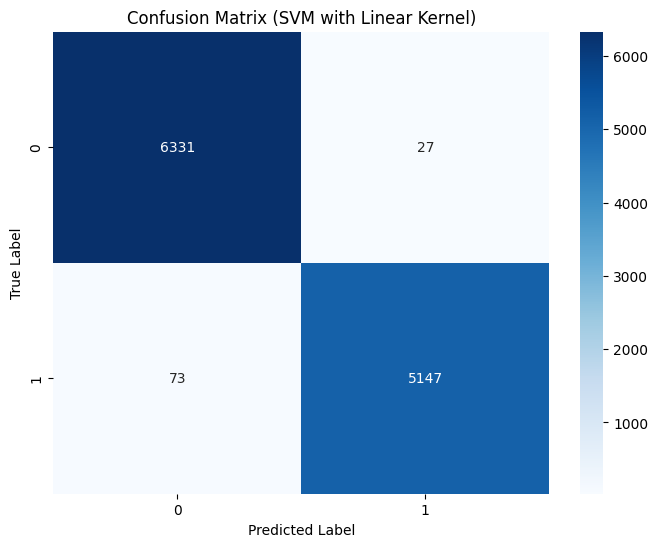


Training Accuracy: 0.9988
Test Accuracy: 0.9914
Mean CV Accuracy: 0.9916


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM classifier with default settings and linear kernel
svm = SVC(kernel='linear', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on the training data
svm.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_test_pred = svm.predict(X_test_tfidf)

# Print classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVM with Linear Kernel)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print accuracies
train_accuracy = svm.score(X_train_tfidf, y_train)
test_accuracy = svm.score(X_test_tfidf, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.99241162 0.9937072  0.99204146 0.98981859 0.99370603]
Mean CV accuracy: 0.9923 (+/- 0.0029)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578



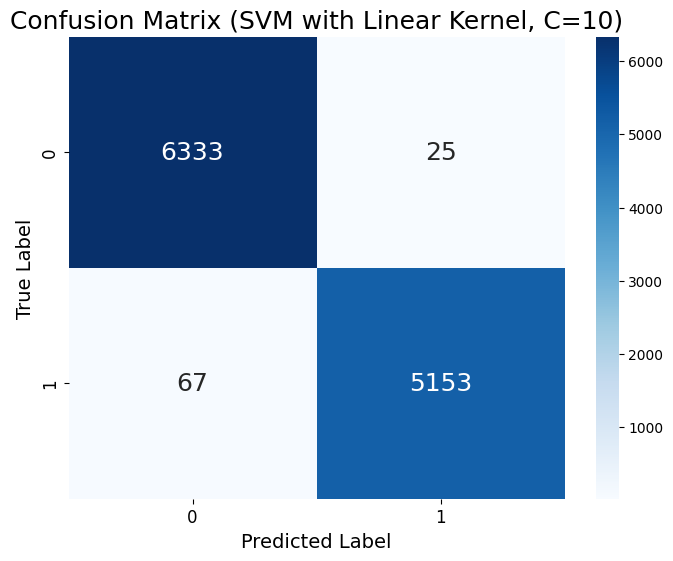

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier with a linear kernel and C=10
svm = SVC(kernel='linear', C=10, random_state=42)

# Perform cross-validation on the training data
cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on the training data
svm.fit(X_train_tfidf, y_train)

# Make predictions on both the training and test sets
y_train_pred = svm.predict(X_train_tfidf)
y_test_pred = svm.predict(X_test_tfidf)

# Print classification reports for training and test sets
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))

# Adjusting font size for annotations and labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 18})
plt.title('Confusion Matrix (SVM with Linear Kernel, C=10)', fontsize=18)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Adjust tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Cross-validation scores: [0.99241162 0.9937072  0.99204146 0.98981859 0.99370603]
Mean CV accuracy: 0.9923 (+/- 0.0029)

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14833
           1       1.00      1.00      1.00     12180

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      5220

    accuracy                           0.99     11578
   macro avg       0.99      0.99      0.99     11578
weighted avg       0.99      0.99      0.99     11578


Final Test Accuracy: 0.9921


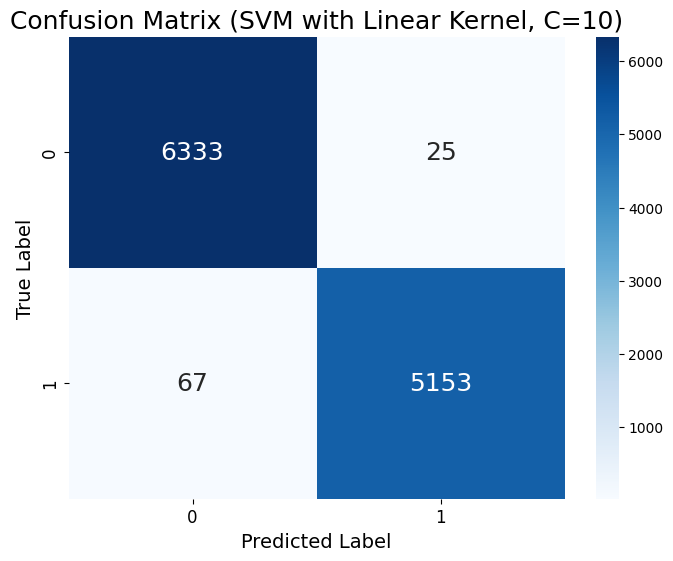

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
# Initialize the SVM classifier with a linear kernel and C=10
svm = SVC(kernel='linear', C=10, random_state=42)

# Perform cross-validation on the training data
cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model on the training data
svm.fit(X_train_tfidf, y_train)

# Make predictions on both the training and test sets
y_train_pred = svm.predict(X_train_tfidf)
y_test_pred = svm.predict(X_test_tfidf)

# Print classification reports for training and test sets
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate and print the final test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))

# Adjusting font size for annotations and labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 18})
plt.title('Confusion Matrix (SVM with Linear Kernel, C=10)', fontsize=18)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Adjust tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Using fasttext

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6e6db75f6eb587e41bcbe779854f30fde7c576bd6ecf2540bda44f091326cb1f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**Using FasText**

In [ ]:
# install fastText
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246561 sha256=b025c27a00efb747d352340ebef77f232f2eb4fe9a7e78288945f5d897141f53
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# Download English version of fasText
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
import fasttext.util
import shutil

# Specify the path to save in Google Drive
save_path = '/content/drive/MyDrive/ML/cc.en.300.bin'

# Download the model (this will save it in the current working directory)
fasttext.util.download_model('en', if_exists='ignore')  # English

# Move the downloaded model to the specified path in Google Drive
shutil.move('cc.en.300.bin', save_path)



In [ ]:
import fasttext.util
import fasttext
# Specify the path to save in Google Drive
save_path = '/content/drive/MyDrive/ML/cc.en.300.bin'

# Load the FastText model from Google Drive
ft = fasttext.load_model(save_path)


In [ ]:
def text_to_vector(text, model):                                                                                #crate a text_to_vector which takes two parameters, text= to be covert to vectors and model= fasttext model
    words = text.split()                                                                                         # split each text into words
    word_vectors = [model.get_word_vector(word) for word in words if word in model.words]                       # get the word vectors for each word in the text
    if len(word_vectors) == 0:                                                                                  # if there are no word vectors, return a zero vector
        return np.zeros(model.get_dimension())                                                                    # return a zero vector
    return np.mean(word_vectors, axis=0)                                                                       # return the mean of the word vectors

In [ ]:
import numpy as np

# Apply fasttex embeddings to ISOT_cleaned_ready
ISOT_cleaned_ready['fasttext_embedding'] = ISOT_cleaned_ready['cleaned_text'].apply(lambda x: text_to_vector(x, ft))

# Define the Google Drive path
save_path = '/content/drive/MyDrive/ML/'

# Extract embeddings as a numpy array
embeddings = np.array(ISOT_cleaned_ready['fasttext_embedding'].tolist())

# Save embeddings to Google Drive
np.save(save_path + 'fasttext_embeddings.npy', embeddings)

# Save labels to Google Drive (assuming 'label_num' is your label column)
np.save(save_path + 'labels.npy', ISOT_cleaned_ready['label_num'].values)

In [2]:
import numpy as np

# Load embeddings
embeddings = np.load('/content/drive/MyDrive/ML/fasttext_embeddings.npy')

# Load labels
labels = np.load('/content/drive/MyDrive/ML/labels.npy')

# Now you can split these into train and test sets
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(embeddings, labels, test_size=0.3, random_state=42)

Using fastText word embeddings with ML

Logistic regression,Random Forest, Decision tree and SVM with fasttext


Logistic Regression
Training accuracy: 0.9464

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14851
           1       0.96      0.92      0.94     12162

    accuracy                           0.95     27013
   macro avg       0.95      0.94      0.95     27013
weighted avg       0.95      0.95      0.95     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6340
           1       0.97      0.91      0.94      5238

    accuracy                           0.95     11578
   macro avg       0.95      0.94      0.95     11578
weighted avg       0.95      0.95      0.95     11578



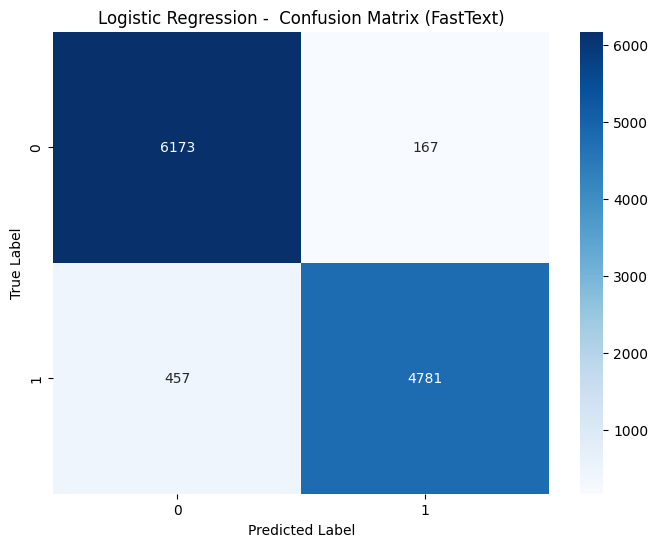


Random Forest
Training accuracy: 1.0000

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14851
           1       1.00      1.00      1.00     12162

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6340
           1       0.97      0.91      0.94      5238

    accuracy                           0.95     11578
   macro avg       0.95      0.94      0.95     11578
weighted avg       0.95      0.95      0.95     11578



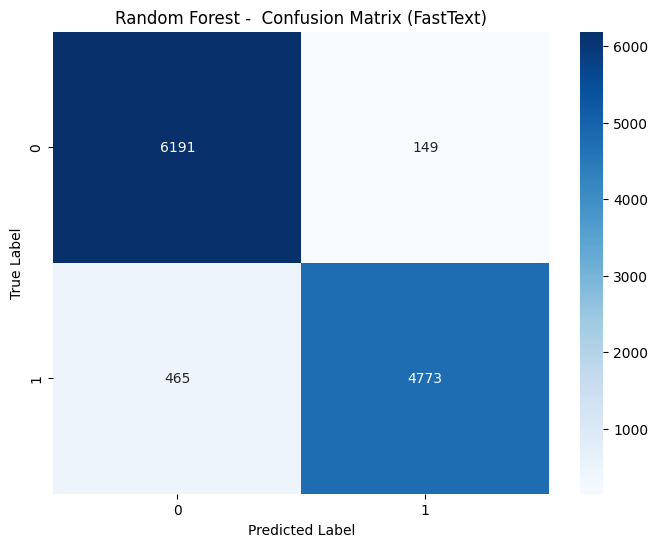


Decision Tree
Training accuracy: 1.0000

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14851
           1       1.00      1.00      1.00     12162

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6340
           1       0.87      0.87      0.87      5238

    accuracy                           0.88     11578
   macro avg       0.88      0.88      0.88     11578
weighted avg       0.88      0.88      0.88     11578



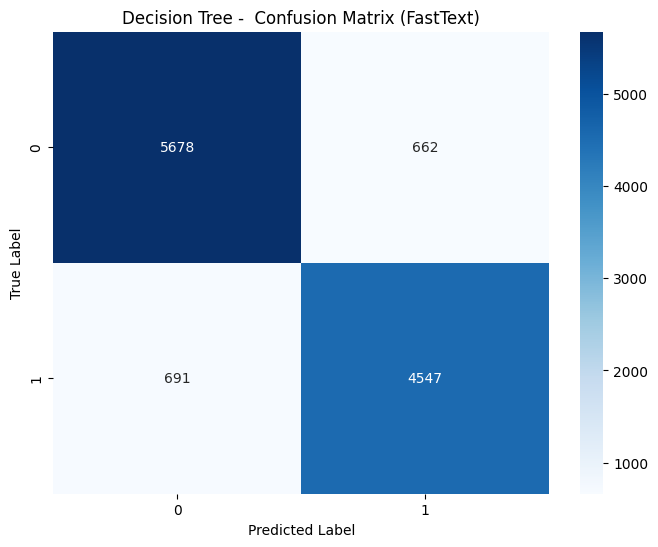


SVM
Training accuracy: 0.9815

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14851
           1       0.99      0.97      0.98     12162

    accuracy                           0.98     27013
   macro avg       0.98      0.98      0.98     27013
weighted avg       0.98      0.98      0.98     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6340
           1       0.99      0.96      0.97      5238

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578



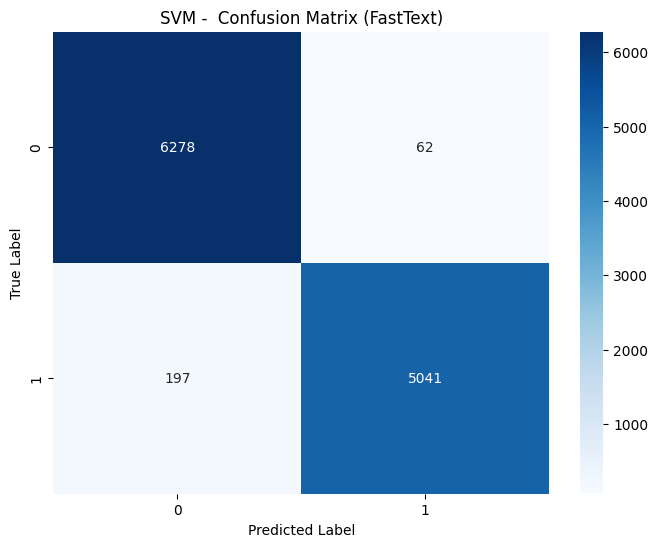

In [ ]:

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
]

# Train and evaluate each classifier
for name, clf in classifiers:
    print(f"\n{name}")

    # Train the model
    clf.fit(Xf_train, yf_train)

    # Calculate training score
    train_score = clf.score(Xf_train, yf_train)
    print(f"Training accuracy: {train_score:.4f}")

    # Make predictions
    yf_train_pred = clf.predict(Xf_train)
    yf_test_pred = clf.predict(Xf_test)

    # Print classification reports
    print("\nTraining Set Classification Report:")
    print(classification_report(yf_train, yf_train_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(yf_test, yf_test_pred))

    # Plot confusion matrix for the test set
    cm = confusion_matrix(yf_test, yf_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} -  Confusion Matrix (FastText)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()




Logistic Regression
Cross-validation scores: [0.96464927 0.96150287 0.96372386 0.96834506 0.96371714]
Mean CV accuracy: 0.9644 (+/- 0.0045)
Training accuracy: 0.9672

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14851
           1       0.97      0.95      0.96     12162

    accuracy                           0.97     27013
   macro avg       0.97      0.97      0.97     27013
weighted avg       0.97      0.97      0.97     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6340
           1       0.98      0.95      0.96      5238

    accuracy                           0.97     11578
   macro avg       0.97      0.96      0.97     11578
weighted avg       0.97      0.97      0.97     11578



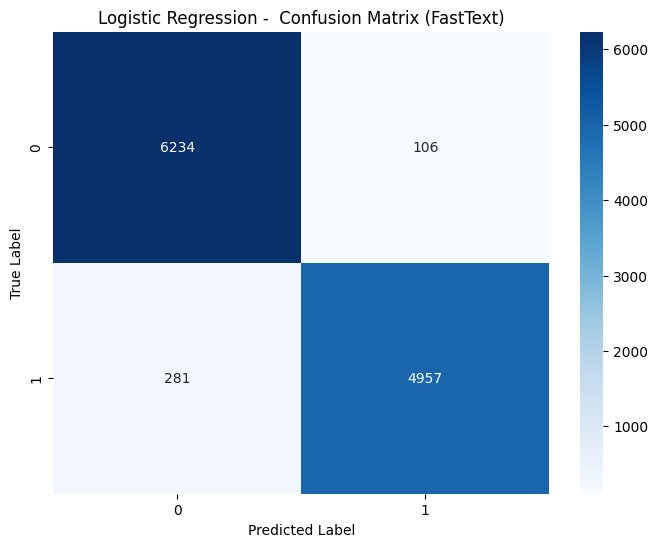

Test accuracy: 0.9666
No significant overfitting detected.


Random Forest
Cross-validation scores: [0.94429021 0.94466037 0.94299463 0.95149944 0.94057756]
Mean CV accuracy: 0.9448 (+/- 0.0073)
Training accuracy: 1.0000

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14851
           1       1.00      1.00      1.00     12162

    accuracy                           1.00     27013
   macro avg       1.00      1.00      1.00     27013
weighted avg       1.00      1.00      1.00     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6340
           1       0.97      0.91      0.94      5238

    accuracy                           0.95     11578
   macro avg       0.95      0.95      0.95     11578
weighted avg       0.95      0.95      0.95     11578



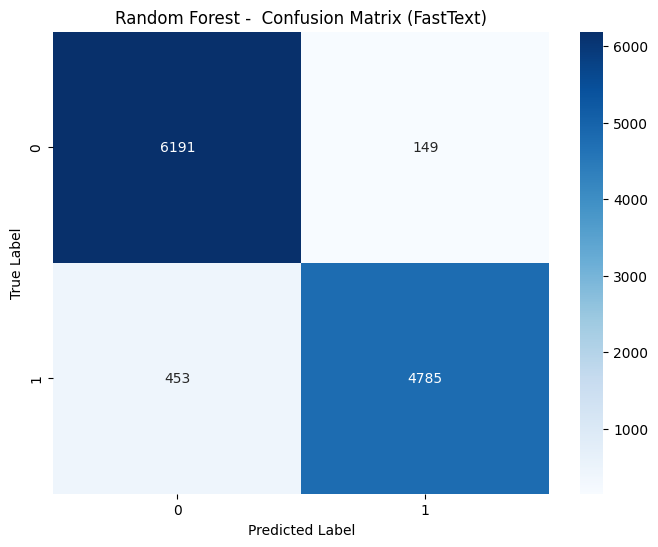

Test accuracy: 0.9480


Decision Tree
Cross-validation scores: [0.87506941 0.86507496 0.87710531 0.88282118 0.86912255]
Mean CV accuracy: 0.8738 (+/- 0.0124)
Training accuracy: 0.8832

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14851
           1       0.92      0.82      0.86     12162

    accuracy                           0.88     27013
   macro avg       0.89      0.88      0.88     27013
weighted avg       0.89      0.88      0.88     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6340
           1       0.90      0.80      0.85      5238

    accuracy                           0.87     11578
   macro avg       0.88      0.86      0.87     11578
weighted avg       0.87      0.87      0.87     11578



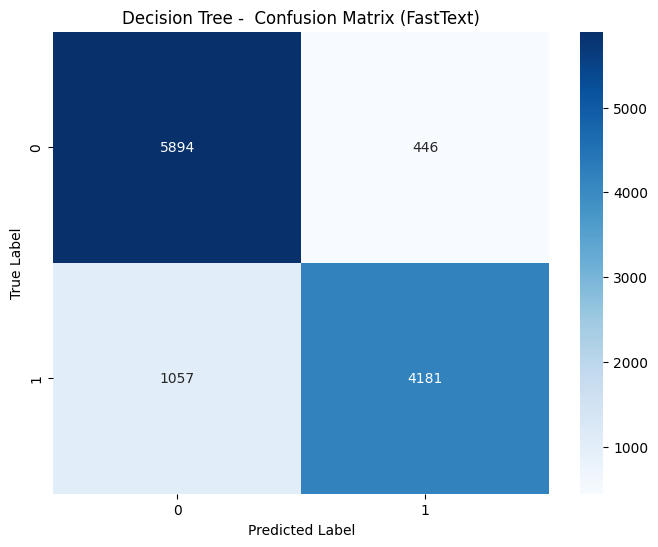

Test accuracy: 0.8702
No significant overfitting detected.


SVM
Cross-validation scores: [0.96946141 0.96872108 0.96946141 0.97241762 0.97056646]
Mean CV accuracy: 0.9701 (+/- 0.0026)
Training accuracy: 0.9734

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14851
           1       0.98      0.96      0.97     12162

    accuracy                           0.97     27013
   macro avg       0.97      0.97      0.97     27013
weighted avg       0.97      0.97      0.97     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6340
           1       0.98      0.95      0.97      5238

    accuracy                           0.97     11578
   macro avg       0.97      0.97      0.97     11578
weighted avg       0.97      0.97      0.97     11578



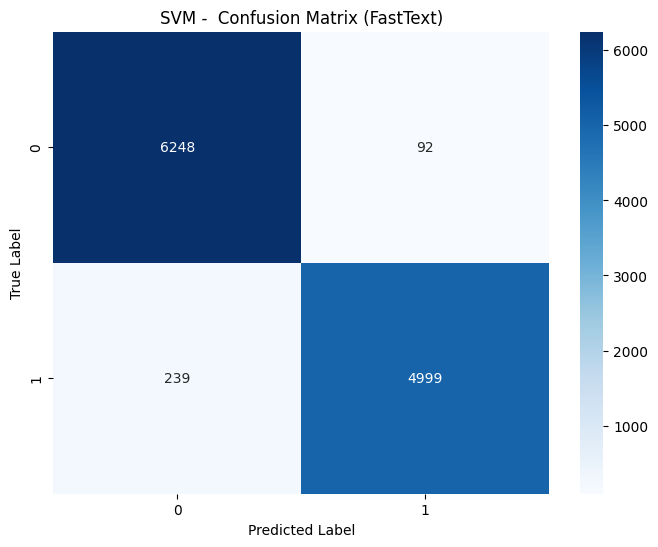

Test accuracy: 0.9714
No significant overfitting detected.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(C=10, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("SVM", SVC(C=10, kernel='linear', random_state=42))
]

# Train and evaluate each classifier
for name, clf in classifiers:
    print(f"\n{name}")

    # Perform cross-validation
    cv_scores = cross_val_score(clf, Xf_train, yf_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

    # Train the model
    clf.fit(Xf_train, yf_train)

    # Calculate training score
    train_score = clf.score(Xf_train, yf_train)
    print(f"Training accuracy: {train_score:.4f}")

    # Make predictions
    yf_train_pred = clf.predict(Xf_train)
    yf_test_pred = clf.predict(Xf_test)

    # Print classification reports
    print("\nTraining Set Classification Report:")
    print(classification_report(yf_train, yf_train_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(yf_test, yf_test_pred))

    # Plot confusion matrix for the test set
    cm = confusion_matrix(yf_test, yf_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} -  Confusion Matrix (FastText)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calculate test accuracy
    test_score = clf.score(Xf_test, yf_test)
    print(f"Test accuracy: {test_score:.4f}")



SVM Classifier (C=10, default RBF kernel)
Cross-validation scores: [0.98056635 0.98241718 0.98223209 0.98370974 0.98352462]
Mean CV accuracy: 0.9825 (+/- 0.0023)
Training accuracy: 0.9919

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14851
           1       0.99      0.99      0.99     12162

    accuracy                           0.99     27013
   macro avg       0.99      0.99      0.99     27013
weighted avg       0.99      0.99      0.99     27013


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6340
           1       0.99      0.97      0.98      5238

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578



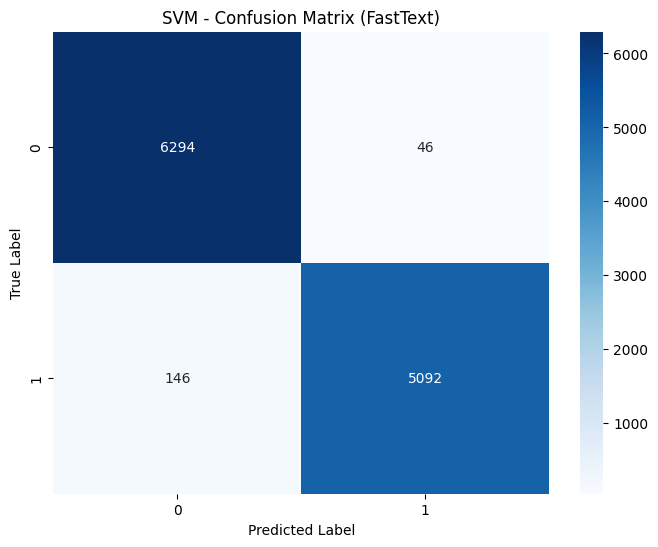

Test accuracy: 0.9834
No significant overfitting detected.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize SVM classifier
svm = SVC(C=10, random_state=42)

print("SVM Classifier (C=10, default RBF kernel)")

# Perform cross-validation
cv_scores = cross_val_score(svm, Xf_train, yf_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Train the model
svm.fit(Xf_train, yf_train)

# Calculate training score
train_score = svm.score(Xf_train, yf_train)
print(f"Training accuracy: {train_score:.4f}")

# Make predictions
yf_train_pred = svm.predict(Xf_train)
yf_test_pred = svm.predict(Xf_test)

# Print classification reports
print("\nTraining Set Classification Report:")
print(classification_report(yf_train, yf_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(yf_test, yf_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(yf_test, yf_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix (FastText)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate test accuracy
test_score = svm.score(Xf_test, yf_test)
print(f"Test accuracy: {test_score:.4f}")

# Check for potential overfitting
if train_score - cv_scores.mean() > 0.05:
    print("Warning: Potential overfitting detected.")
else:
    print("No significant overfitting detected.")

Using LSTM with fasttext

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 1, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 128)              │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,361 (1.34 MB)

 Trainable params: 351,361 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.8577 - loss: 0.3011 - val_accuracy: 0.9648 - val_loss: 0.1013
Epoch 2/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9640 - loss: 0.1033 - val_accuracy: 0.9677 - val_loss: 0.0903
Epoch 3/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9692 - loss: 0.0881 - val_accuracy: 0.9685 - val_loss: 0.0874
Epoch 4/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9716 - loss: 0.0811 - val_accuracy: 0.9699 - val_loss: 0.0809
Epoch 5/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9738 - loss: 0.0763 - val_accuracy: 0.9726 - val_loss: 0.0754
Epoch 6/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9748 - loss: 0.0728 - val_accuracy: 0.9734 - val_loss: 0.0734
Epoch 7/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.9731 - loss: 0.0745 - val_accuracy: 0.9721 - val_loss: 0.0759
Epoch 8/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9742 - loss: 0.0707 - 

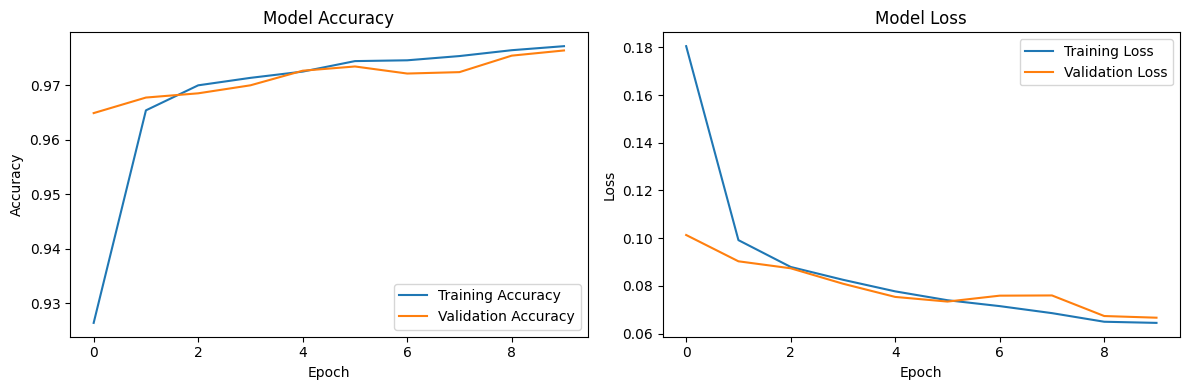

362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6340
           1       0.98      0.96      0.97      5238

    accuracy                           0.98     11578
   macro avg       0.98      0.98      0.98     11578
weighted avg       0.98      0.98      0.98     11578



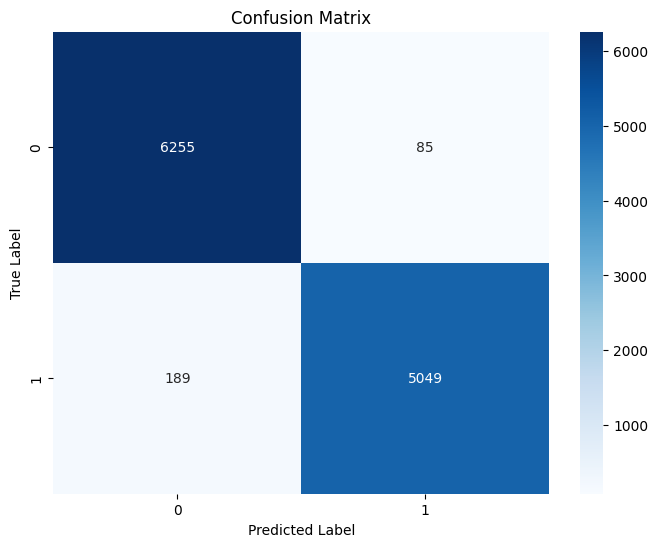

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Reshape
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Convert labels to binary format (0 and 1)
le = LabelEncoder()
yf_train_encoded = le.fit_transform(yf_train)
yf_test_encoded = le.transform(yf_test)

# Get the input shape
input_shape = Xf_train.shape[1]

# Define the LSTM model
model = Sequential([
    InputLayer(input_shape=(input_shape,)),
    Reshape((1, input_shape)),  # Reshape to (1, features) to add time dimension
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()   # use this to understand the architecture of the model

# Train the model
history = model.fit(
    Xf_train, yf_train_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(Xf_test, yf_test_encoded),
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(Xf_test, yf_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred = model.predict(Xf_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(yf_test_encoded, y_pred_classes))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yf_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Detecting fallacies on the sample data

In [ ]:
import pandas as pd
# Load the CSV file into a DataFrame
fallacy_df = pd.read_excel('/content/drive/MyDrive/ML/final fallacies.xlsx')


# Display the first few rows to confirm it's loaded correctly
print("DataFrame loaded successfully:")
print(fallacy_df.head())
print("\nDataFrame info:")
fallacy_df.info()


DataFrame loaded successfully:
                                           statement             fallacies
0  Says popular food and drink items such as Kraf...     appeal to emotion
1  "There are billboards in Central America in th...     appeal to emotion
2  An HIV-positive Cadbury worker has been arrest...     appeal to emotion
3  "Every (personhood) bill IÃ¢â‚¬â„¢ve ever supp...  hasty generalisation
4  "Today and every day, an estimated 14,000 Amer...     appeal to emotion

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  200 non-null    object
 1   fallacies  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
fallacy_df.isna().sum()

statement    0
fallacies    0
dtype: int64

In [ ]:
fallacy_df.duplicated().sum()

0

In [ ]:
fallacy_df.duplicated(subset=['statement']).sum()

0

In [ ]:
# Check the fallacy distribution in the new dataset
new_fallacy_distribution = fallacy_df['fallacies'].value_counts()

print(new_fallacy_distribution)

fallacies
appeal to emotion       64
hasty generalisation    52
false cause             32
appeal to fear          31
cherry picking          21
Name: count, dtype: int64


In [ ]:

# Create a function to count words
def word_count(text):
    return len(str(text).split())

# Apply the word count function to create a new column
fallacy_df['word_count'] = fallacy_df['statement'].apply(word_count)

In [ ]:
fallacy_df.describe()


word_count
count  200.000000
mean    19.025000
std      8.102011
min      4.000000
25%     13.000000
50%     17.500000
75%     24.000000
max     50.000000

In [ ]:
#
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Now get the value counts for the 'fallacies' column
fallacy_counts = fallacy_df['fallacies'].value_counts()

# Generate a color map using the 'viridis' colormap
colors = cm.viridis(np.linspace(0, 1, len(fallacy_counts)))

# Create a bar chart to visualize the distribution of fallacies
plt.figure(figsize=(10, 6))
fallacy_counts.plot(kind='bar', color=colors)

# Set titles and labels for aesthetics
plt.title('Distribution of Fallacies', fontsize=16)
plt.xlabel('Fallacies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()



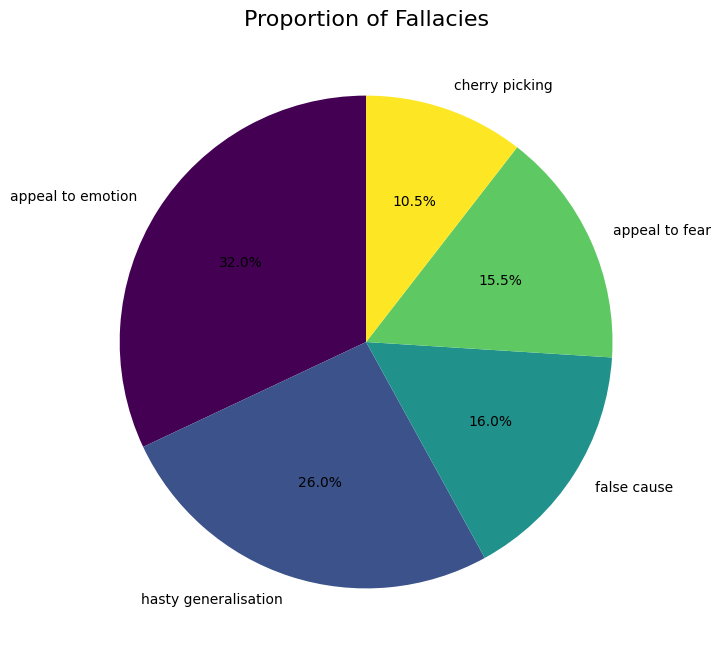

In [ ]:
# Create a pie chart to visualize the proportion of each fallacy
plt.figure(figsize=(8, 8))
fallacy_df['fallacies'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')

# Set the title for aesthetics
plt.title('Proportion of Fallacies', fontsize=16)

# Display the chart
plt.ylabel('')  # Remove default ylabel for a cleaner look
plt.show()


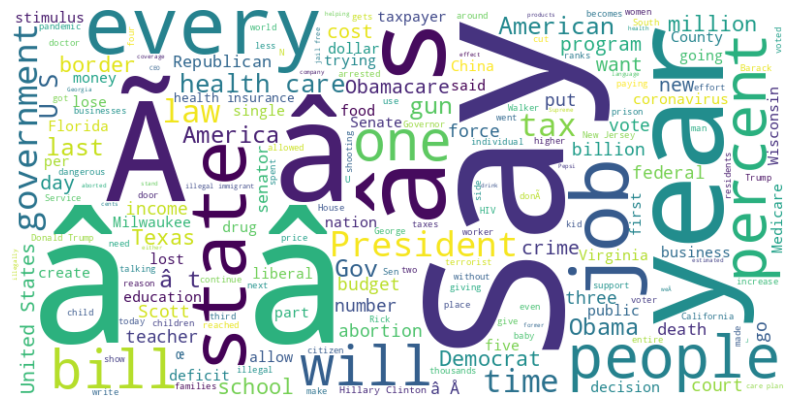

In [ ]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fallacy_df['statement']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for aesthetics
plt.show()


In [ ]:
# Define a mapping for grouping fallacies into broader categories (updated as per your request)
fallacy_group_mapping = {
    'appeal to emotion': 'Emotional Fallacies',
    'appeal to fear': 'Emotional Fallacies',
    'false cause': 'Fallacies of insufficient evidence',
    'hasty generalisation': 'Fallacies of insufficient evidence',
    'cherry picking': 'Fallacies of insufficient evidence'

}

# Apply the mapping to create a new column for broader categories
fallacy_df['fallacy_group'] = fallacy_df['fallacies'].map(fallacy_group_mapping)

# Check the distribution of the new categories
grouped_fallacy_distribution = fallacy_df['fallacy_group'].value_counts()

# Display the grouped fallacy distribution
print("Grouped Fallacy Distribution:")
print(grouped_fallacy_distribution)


Grouped Fallacy Distribution:
fallacy_group
Fallacies of insufficient evidence    105
Emotional Fallacies                    95
Name: count, dtype: int64


In [ ]:
fallacy_df.head()

statement             fallacies  \
0  Says popular food and drink items such as Kraf...     appeal to emotion   
1  "There are billboards in Central America in th...     appeal to emotion   
2  An HIV-positive Cadbury worker has been arrest...     appeal to emotion   
3  "Every (personhood) bill IÃ¢â‚¬â„¢ve ever supp...  hasty generalisation   
4  "Today and every day, an estimated 14,000 Amer...     appeal to emotion   

   word_count                       fallacy_group  
0          28                 Emotional Fallacies  
1          24                 Emotional Fallacies  
2          13                 Emotional Fallacies  
3          27  Fallacies of insufficient evidence  
4          14                 Emotional Fallacies

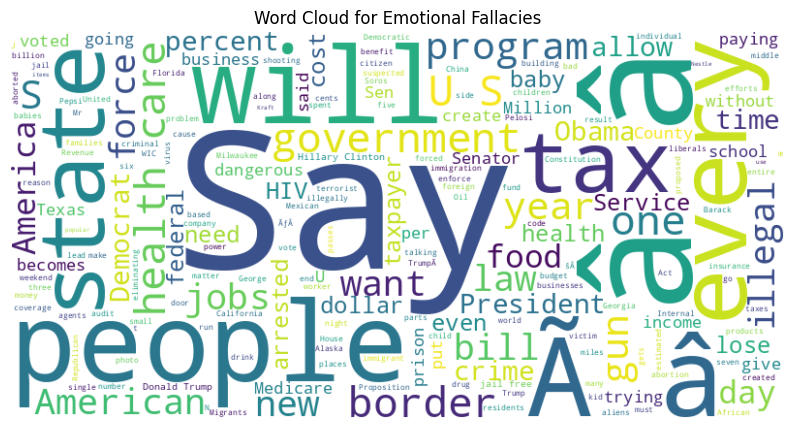

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only 'Emotional Fallacies'
emotional_fallacies = fallacy_df[fallacy_df['fallacy_group'] == 'Emotional Fallacies']

# Combine all statements into a single string
text = ' '.join(emotional_fallacies['statement'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for aesthetics
plt.title('Word Cloud for Emotional Fallacies')
plt.show()

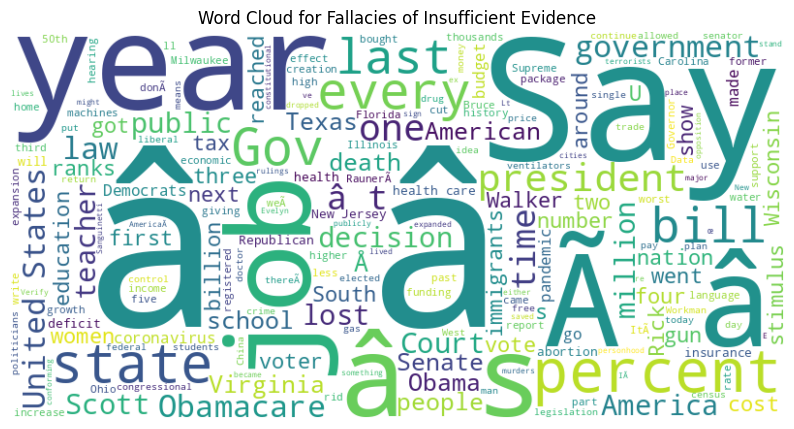

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only 'Fallacies of insufficient evidence'
insufficient_evidence_fallacies = fallacy_df[fallacy_df['fallacy_group'] == 'Fallacies of insufficient evidence']

# Combine all statements into a single string
text = ' '.join(insufficient_evidence_fallacies['statement'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes for aesthetics
plt.title('Word Cloud for Fallacies of Insufficient Evidence')
plt.show()

<ipython-input-32-b984eaeab9aa>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, grouped_fallacy_distribution[index] + 1, f'{value:.2f}%', ha='center', fontsize=10)


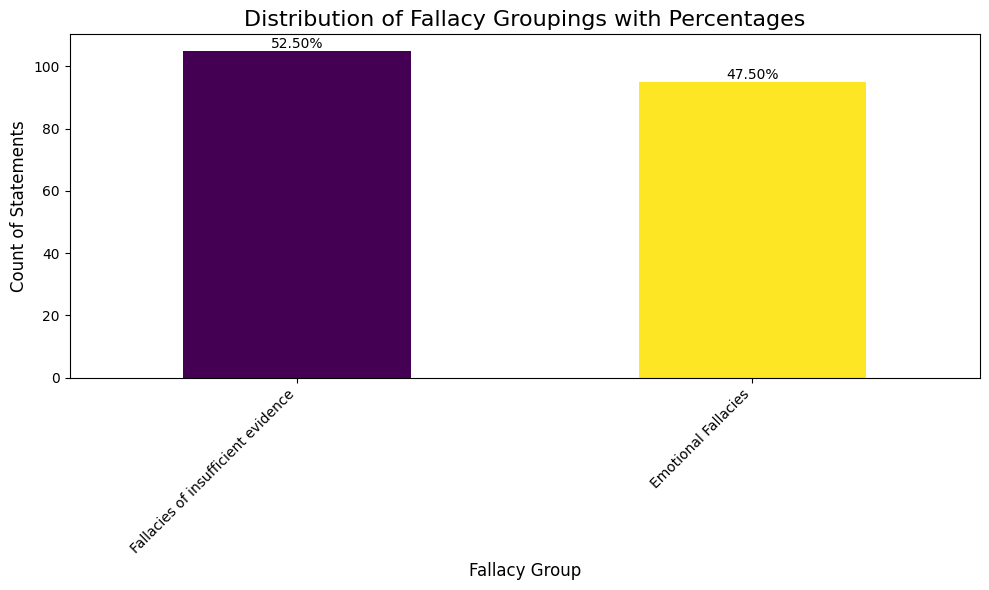

In [ ]:
# Calculate the percentages for the fallacy groups
grouped_fallacy_distribution_percent = (grouped_fallacy_distribution / grouped_fallacy_distribution.sum()) * 100

# Generate color map using 'viridis' colormap for the number of categories
colors = cm.viridis(plt.Normalize()(range(len(grouped_fallacy_distribution))))

# Create the bar chart with both count and percentage of the new fallacy groupings
plt.figure(figsize=(10, 6))
grouped_fallacy_distribution.plot(kind='bar', color=colors)

# Annotate the bars with percentages
for index, value in enumerate(grouped_fallacy_distribution_percent):
    plt.text(index, grouped_fallacy_distribution[index] + 1, f'{value:.2f}%', ha='center', fontsize=10)

# Set titles and labels for aesthetics
plt.title('Distribution of Fallacy Groupings with Percentages', fontsize=16)
plt.xlabel('Fallacy Group', fontsize=12)
plt.ylabel('Count of Statements', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


<ipython-input-33-a4c14e004547>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, grouped_fallacy_distribution[index] + 1, f'{value:.2f}%', ha='center', fontsize=10)


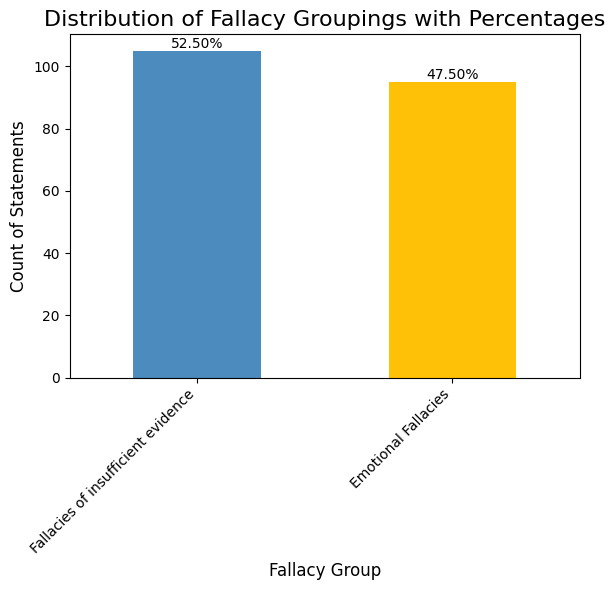

In [ ]:

grouped_fallacy_distribution_percent = (grouped_fallacy_distribution / grouped_fallacy_distribution.sum()) * 100

# Adjusting the figure size to make it slimmer in width
plt.figure(figsize=(6, 6))  # Reducing the width

# Assuming you have your own 'grouped_fallacy_distribution' data passed in here:
# grouped_fallacy_distribution = pd.Series([...], index=[...])

# Custom aesthetic color palette for the bar chart
colors = ['#4B8BBE', '#FFC107']  # Example: a calm blue and a golden yellow

# Create the bar chart with both count and percentage of the new fallacy groupings
grouped_fallacy_distribution.plot(kind='bar', color=colors)

# Annotate the bars with percentages
for index, value in enumerate(grouped_fallacy_distribution_percent):
    plt.text(index, grouped_fallacy_distribution[index] + 1, f'{value:.2f}%', ha='center', fontsize=10)

# Set titles and labels for aesthetics
plt.title('Distribution of Fallacy Groupings with Percentages', fontsize=16)
plt.xlabel('Fallacy Group', fontsize=12)
plt.ylabel('Count of Statements', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()



In [ ]:
# Define a mapping to assign numerical values to the fallacy groups
modeling_values_mapping = {
    'Emotional Fallacies': 0,
    'Fallacies of insufficient evidence': 1,

}

# Create a new column 'fallacy_model_value' using the mapping
fallacy_df['fallacy_model_value'] = fallacy_df['fallacy_group'].map(modeling_values_mapping)

# Display the first few rows of the DataFrame to verify the new column
print(fallacy_df[['fallacy_group', 'fallacy_model_value']].head())


                        fallacy_group  fallacy_model_value
0                 Emotional Fallacies                    0
1                 Emotional Fallacies                    0
2                 Emotional Fallacies                    0
3  Fallacies of insufficient evidence                    1
4                 Emotional Fallacies                    0


In [ ]:
# Reshuffle the dataset randomly after adding the new column for modeling
reshuffled_df = fallacy_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the reshuffled DataFrame to verify
print(reshuffled_df[['fallacy_group', 'fallacy_model_value']].head())


                        fallacy_group  fallacy_model_value
0                 Emotional Fallacies                    0
1  Fallacies of insufficient evidence                    1
2                 Emotional Fallacies                    0
3  Fallacies of insufficient evidence                    1
4  Fallacies of insufficient evidence                    1


In [ ]:
import spacy
import re
import pandas as pd

# Load the spaCy language model (English)
nlp = spacy.load('en_core_web_sm')

def custom_clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove all characters except letters, numbers, and whitespace
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Apply the cleaning function to the 'statement' column of the reshuffled DataFrame
reshuffled_df['cleaned_statement'] = reshuffled_df['statement'].apply(custom_clean_text)

# Display the first few rows of the reshuffled DataFrame to verify
print(reshuffled_df[['fallacy_group', 'fallacy_model_value', 'statement', 'cleaned_statement']].head())

                        fallacy_group  fallacy_model_value  \
0                 Emotional Fallacies                    0   
1  Fallacies of insufficient evidence                    1   
2                 Emotional Fallacies                    0   
3  Fallacies of insufficient evidence                    1   
4  Fallacies of insufficient evidence                    1   

                                           statement  \
0  The "Health Care Compact bill would end Medica...   
1    Says Gov. Rick Scott lost Florida 331,247 jobs.   
2  Every illegal immigrant "can be eligible for u...   
3  "Over the next two years, this $1.8 billion de...   
4  U.S. tariffs on China are "not hurting anybody...   

                                   cleaned_statement  
0  the health care compact bill would end medicar...  
1       says gov rick scott lost florida 331247 jobs  
2  every illegal immigrant can be eligible for up...  
3  over the next two years this 18 billion defici...  
4  us tariffs o

In [ ]:
reshuffled_df['fallacy_model_value'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

# Features (cleaned text data)
X = reshuffled_df['cleaned_statement']

# Target (numerical labels)
y = reshuffled_df['fallacy_model_value']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the size of the training and test sets
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Display a few samples from the training set
print("Sample features (X_train):")
print(X_train.head())
print("\nCorresponding labels (y_train):")
print(y_train.head())

# Optional: Check class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set size: 160
Test set size: 40
Sample features (X_train):
125    says nancy pelosi spent 497 million on office ...
151    the providence teacher contract is one of the ...
78     in july 2010 the government said small busines...
175    the president went on a stimulusfueled spendin...
113    gun homicide is down 49 percent in the past 12...
Name: cleaned_statement, dtype: object

Corresponding labels (y_train):
125    0
151    1
78     0
175    1
113    1
Name: fallacy_model_value, dtype: int64

Class distribution in training set:
fallacy_model_value
1    0.525
0    0.475
Name: proportion, dtype: float64

Class distribution in test set:
fallacy_model_value
1    0.525
0    0.475
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both the training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed training and test data
print(f'Training data shape (TF-IDF): {X_train_tfidf.shape}')
print(f'Test data shape (TF-IDF): {X_test_tfidf.shape}')



Training data shape (TF-IDF): (160, 1298)
Test data shape (TF-IDF): (40, 1298)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)

# Print the cross-validation scores and their average
print(f'Cross-validation scores: {cv_scores}')
print(f'Average CV score: {cv_scores.mean()}')


Cross-validation scores: [0.5625  0.71875 0.78125 0.6875  0.6875 ]
Average CV score: 0.6875


Best parameters: {'C': 1}
Best cross-validation score: 0.6875

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.99      1.00      0.99        84

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.65      0.62      0.63        21

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.63      0.62      0.63        40


Final Training Accuracy: 0.9938
Final Test Accuracy: 0.6250


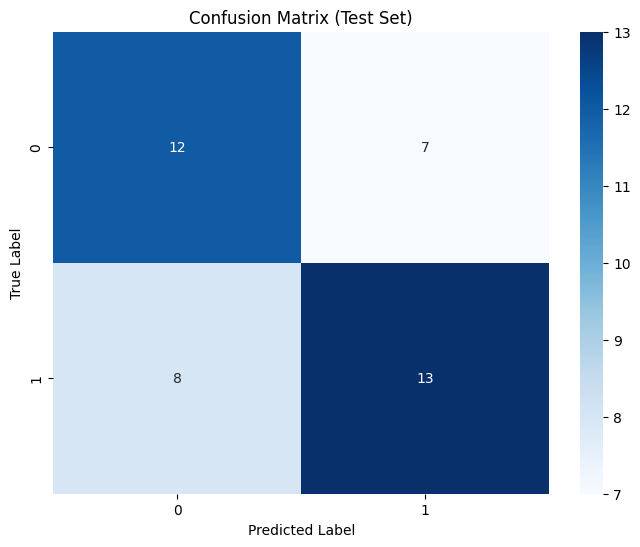

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10]}

# Initialize the SVM classifier with linear kernel
svm = SVC(kernel='linear', random_state=42)

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Use the best model to make predictions on the training and test sets
best_svm = grid_search.best_estimator_
y_train_pred = best_svm.predict(X_train_tfidf)
y_test_pred = best_svm.predict(X_test_tfidf)

# Print the classification reports
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print the final accuracies
train_accuracy = best_svm.score(X_train_tfidf, y_train)
test_accuracy = best_svm.score(X_test_tfidf, y_test)
print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Create the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()